<a href="https://colab.research.google.com/github/unosungwon/dacon_e-commerce_contest/blob/main/0_cluster_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# 한글 폰트 깨짐 방지
# 실행 후, 세션 다시 시작 해야 함
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (4,033 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 데이터 불러오기

In [ ]:
all_cluster= pd.read_csv("/content/drive/MyDrive/프로젝트/데이터 세트/dacon_dataset.csv")
all_cluster.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01,...,0.10,ELEC10,10.0,1,153.71,15.371,175.581,1,138.339,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,2019-01,...,0.10,ELEC10,10.0,1,153.71,15.371,175.581,1,138.339,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2019-01,...,0.10,OFF10,10.0,1,2.05,0.205,8.755,1,1.845,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,2019-01,...,0.18,SALE10,10.0,1,87.65,15.777,109.927,0,87.650,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,2019-01,...,0.18,AIO10,10.0,1,16.50,2.970,25.970,1,14.850,16.50


- 클러스터 0번 (휴면고객) DF 뽑기

In [ ]:
cluster_0 = all_cluster.loc[all_cluster['cluster_number'] == 0]

In [ ]:
cluster_0 = cluster_0.reset_index()
cluster_0 = cluster_0.drop("index", axis=1)

In [ ]:
cluster_0

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
0,USER_0066,Transaction_0009,2019-01-01,Product_0185,Office,1,2.47,102.79,Used,2019-01,...,0.10,OFF10,10.0,0,2.47,0.2470,105.5070,1,2.223,2.47
1,USER_0066,Transaction_0009,2019-01-01,Product_0879,Drinkware,26,8.72,102.79,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,226.72,40.8096,370.3196,0,226.720,226.72
2,USER_0066,Transaction_0009,2019-01-01,Product_0904,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
3,USER_0066,Transaction_0009,2019-01-01,Product_1134,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
4,USER_0066,Transaction_0009,2019-01-01,Product_1142,Notebooks & Journals,26,7.93,102.79,Not Used,2019-01,...,0.05,NJ10,10.0,0,206.18,10.3090,319.2790,0,206.180,206.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14972,USER_0511,Transaction_17085,2019-09-18,Product_0976,Nest-USA,1,119.00,6.00,Clicked,2019-09,...,0.10,ELEC30,30.0,0,119.00,11.9000,136.9000,0,119.000,119.00
14973,USER_0087,Transaction_17100,2019-09-19,Product_0539,Apparel,6,4.80,12.91,Used,2019-09,...,0.18,SALE30,30.0,0,28.80,5.1840,46.8940,1,20.160,28.80
14974,USER_0087,Transaction_17100,2019-09-19,Product_0541,Apparel,4,4.80,12.91,Not Used,2019-09,...,0.18,SALE30,30.0,0,19.20,3.4560,35.5660,0,19.200,19.20
14975,USER_0087,Transaction_17100,2019-09-19,Product_0614,Apparel,6,4.80,12.91,Clicked,2019-09,...,0.18,SALE30,30.0,0,28.80,5.1840,46.8940,0,28.800,28.80


In [ ]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14977 entries, 0 to 14976
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   고객ID            14977 non-null  object 
 1   거래ID            14977 non-null  object 
 2   거래날짜            14977 non-null  object 
 3   제품ID            14977 non-null  object 
 4   제품카테고리          14977 non-null  object 
 5   수량              14977 non-null  int64  
 6   평균금액            14977 non-null  float64
 7   배송료             14977 non-null  float64
 8   쿠폰상태            14977 non-null  object 
 9   기준연월            14977 non-null  object 
 10  월               14977 non-null  int64  
 11  성별              14977 non-null  object 
 12  고객지역            14977 non-null  object 
 13  GST             14977 non-null  float64
 14  쿠폰코드            14842 non-null  object 
 15  할인율             14977 non-null  float64
 16  cluster_number  14977 non-null  int64  
 17  구매가격            14977 non-null 

# 1장 - 필요한 원천 데이터 프레임 만들기

# 데이터프레임

## 1) 0번 클러스터

- 필요 컬럼 추가

In [ ]:
cluster_0['부가세'] = cluster_0['monetary'] * cluster_0['GST']

In [ ]:
cluster_0

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
0,USER_0066,Transaction_0009,2019-01-01,Product_0185,Office,1,2.47,102.79,Used,2019-01,...,0.10,OFF10,10.0,0,2.47,0.2223,105.5070,1,2.223,2.47
1,USER_0066,Transaction_0009,2019-01-01,Product_0879,Drinkware,26,8.72,102.79,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,226.72,40.8096,370.3196,0,226.720,226.72
2,USER_0066,Transaction_0009,2019-01-01,Product_0904,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
3,USER_0066,Transaction_0009,2019-01-01,Product_1134,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
4,USER_0066,Transaction_0009,2019-01-01,Product_1142,Notebooks & Journals,26,7.93,102.79,Not Used,2019-01,...,0.05,NJ10,10.0,0,206.18,10.3090,319.2790,0,206.180,206.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14972,USER_0511,Transaction_17085,2019-09-18,Product_0976,Nest-USA,1,119.00,6.00,Clicked,2019-09,...,0.10,ELEC30,30.0,0,119.00,11.9000,136.9000,0,119.000,119.00
14973,USER_0087,Transaction_17100,2019-09-19,Product_0539,Apparel,6,4.80,12.91,Used,2019-09,...,0.18,SALE30,30.0,0,28.80,3.6288,46.8940,1,20.160,28.80
14974,USER_0087,Transaction_17100,2019-09-19,Product_0541,Apparel,4,4.80,12.91,Not Used,2019-09,...,0.18,SALE30,30.0,0,19.20,3.4560,35.5660,0,19.200,19.20
14975,USER_0087,Transaction_17100,2019-09-19,Product_0614,Apparel,6,4.80,12.91,Clicked,2019-09,...,0.18,SALE30,30.0,0,28.80,5.1840,46.8940,0,28.800,28.80


In [ ]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14977 entries, 0 to 14976
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   고객ID            14977 non-null  object 
 1   거래ID            14977 non-null  object 
 2   거래날짜            14977 non-null  object 
 3   제품ID            14977 non-null  object 
 4   제품카테고리          14977 non-null  object 
 5   수량              14977 non-null  int64  
 6   평균금액            14977 non-null  float64
 7   배송료             14977 non-null  float64
 8   쿠폰상태            14977 non-null  object 
 9   기준연월            14977 non-null  object 
 10  월               14977 non-null  int64  
 11  성별              14977 non-null  object 
 12  고객지역            14977 non-null  object 
 13  GST             14977 non-null  float64
 14  쿠폰코드            14842 non-null  object 
 15  할인율             14977 non-null  float64
 16  cluster_number  14977 non-null  int64  
 17  구매가격            14977 non-null 

## 2) 고객별 구매가격, 부가세, 배송료, 소비자부담가격 데이터프레임

In [ ]:
cluster_0_total_price = pd.pivot_table(
    cluster_0,
    index = ["고객ID",  "거래ID"]
)
cluster_0_total_price

GST  cluster_number  monetary     구매가격  \
고객ID      거래ID                                                             
USER_0000 Transaction_16900  0.140000               0   10.8465   15.495   
USER_0004 Transaction_16887  0.180000               0    8.3230   11.890   
          Transaction_16888  0.180000               0   10.3900   10.390   
          Transaction_16889  0.115000               0   83.6500  113.500   
          Transaction_16890  0.100000               0  238.0000  238.000   
...                               ...             ...       ...      ...   
USER_1458 Transaction_16869  0.100000               0   69.6500   99.500   
USER_1462 Transaction_11711  0.140000               0    8.3900    8.390   
          Transaction_11712  0.180000               0   16.3900   16.390   
USER_1465 Transaction_10833  0.180000               0   14.6900   14.690   
          Transaction_5988   0.168571               0   11.9010   12.410   

                               배송료        부가세     소비자부담가격         수량  월  \
고객ID      거래ID                                                            
USER_0000 Transaction_16900  75.00   1.644370   92.844100   1.500000  9   
USER_0004 Transaction_16887   6.00   1.498140   20.030200   1.000000  9   
          Transaction_16888   6.50   1.870200   18.760200   1.000000  9   
          Transaction_16889   6.00   6.002500  126.995000   1.000000  9   
          Transaction_16890  12.99  23.800000  274.790000   2.000000  9   
...                            ...        ...         ...        ... ..   
USER_1458 Transaction_16869   6.00   6.965000  115.450000  50.000000  9   
USER_1462 Transaction_11711   6.50   1.446600   16.336600   1.000000  7   
          Transaction_11712   6.00   2.950200   25.340200   1.000000  7   
USER_1465 Transaction_10833   6.00   2.644200   23.334200   1.000000  6   
          Transaction_5988    6.50   2.109471   21.107457   1.285714  4   

                             쿠폰 미적용 비용   쿠폰사용라벨링        평균금액   할인율  
고객ID      거래ID                                                      
USER_0000 Transaction_16900     15.495  1.000000   12.745000  30.0  
USER_0004 Transaction_16887     11.890  1.000000   11.890000  30.0  
          Transaction_16888     10.390  0.000000   10.390000  30.0  
          Transaction_16889    113.500  0.500000  113.500000  30.0  
          Transaction_16890    238.000  0.000000  119.000000  30.0  
...                                ...       ...         ...   ...  
USER_1458 Transaction_16869     99.500  1.000000    1.990000  30.0  
USER_1462 Transaction_11711      8.390  0.000000    8.390000  10.0  
          Transaction_11712     16.390  0.000000   16.390000  10.0  
USER_1465 Transaction_10833     14.690  0.000000   14.690000  30.0  
          Transaction_5988      12.410  0.428571   10.664286  10.0  

[7072 rows x 13 columns]

In [ ]:
cluster_0_total_price = cluster_0_total_price.drop(["GST", "cluster_number", "monetary","구매가격", "부가세","소비자부담가격", "수량",  "쿠폰사용라벨링", "평균금액", "할인율"], axis=1)

In [ ]:
cluster_0_total_price

배송료  월  쿠폰 미적용 비용
고객ID      거래ID                                  
USER_0000 Transaction_16900  75.00  9     15.495
USER_0004 Transaction_16887   6.00  9     11.890
          Transaction_16888   6.50  9     10.390
          Transaction_16889   6.00  9    113.500
          Transaction_16890  12.99  9    238.000
...                            ... ..        ...
USER_1458 Transaction_16869   6.00  9     99.500
USER_1462 Transaction_11711   6.50  7      8.390
          Transaction_11712   6.00  7     16.390
USER_1465 Transaction_10833   6.00  6     14.690
          Transaction_5988    6.50  4     12.410

[7072 rows x 3 columns]

In [ ]:
# merge 시키기 위해 고객ID, 거래ID 를 컬럼으로 내보내기
cluster_0_total_price = cluster_0_total_price.reset_index()

gb1 = cluster_0.groupby(["고객ID", "거래ID"])[["monetary", "부가세"]].sum()
gb1 = gb1.reset_index()

cluster_0_total_price = pd.merge(cluster_0_total_price, gb1, on=["고객ID", "거래ID"])

In [ ]:
cluster_0_total_price

,고객ID,거래ID,배송료,월,쿠폰 미적용 비용,monetary,부가세
0,USER_0000,Transaction_16900,75.00,9,15.495,21.693,3.28874
1,USER_0004,Transaction_16887,6.00,9,11.890,8.323,1.49814
2,USER_0004,Transaction_16888,6.50,9,10.390,10.390,1.87020
3,USER_0004,Transaction_16889,6.00,9,113.500,167.300,12.00500
4,USER_0004,Transaction_16890,12.99,9,238.000,238.000,23.80000
...,...,...,...,...,...,...,...
7067,USER_1458,Transaction_16869,6.00,9,99.500,69.650,6.96500
7068,USER_1462,Transaction_11711,6.50,7,8.390,16.780,2.89320
7069,USER_1462,Transaction_11712,6.00,7,16.390,32.780,5.90040
7070,USER_1465,Transaction_10833,6.00,6,14.690,14.690,2.64420


In [ ]:
# 칼럼추가
cluster_0_total_price["소비자부담가격"] = cluster_0_total_price["배송료"] + cluster_0_total_price["부가세"]
cluster_0_total_price["소비자총부담가격"] = cluster_0_total_price["monetary"] + cluster_0_total_price["배송료"] + cluster_0_total_price["부가세"]


In [ ]:
# 고객지역 칼럼도 추가해주기

# cluster_0 df 에서 원하는 컬럼만 갖고 와서 중복 제거 (고유한 고객 ID 만 남기기)
gb_reg = cluster_0[["고객ID","고객지역"]]
gb_reg = gb_reg.drop_duplicates(["고객ID"])

# cluster_0_total_price 에 merge 시키기
cluster_0_total_price = pd.merge(cluster_0_total_price, gb_reg, on=["고객ID"])

# 칼럼 재배치
cluster_0_total_price = cluster_0_total_price[["고객ID", "거래ID", "고객지역", "monetary", "월", "배송료", "부가세", "소비자부담가격", "소비자총부담가격"]]

### 결과

In [ ]:
cluster_0_total_price

,고객ID,거래ID,고객지역,monetary,월,배송료,부가세,소비자부담가격,소비자총부담가격
0,USER_0000,Transaction_16900,New York,21.693,9,75.00,3.28874,78.28874,99.98174
1,USER_0004,Transaction_16887,Chicago,8.323,9,6.00,1.49814,7.49814,15.82114
2,USER_0004,Transaction_16888,Chicago,10.390,9,6.50,1.87020,8.37020,18.76020
3,USER_0004,Transaction_16889,Chicago,167.300,9,6.00,12.00500,18.00500,185.30500
4,USER_0004,Transaction_16890,Chicago,238.000,9,12.99,23.80000,36.79000,274.79000
...,...,...,...,...,...,...,...,...,...
7067,USER_1458,Transaction_16869,New Jersey,69.650,9,6.00,6.96500,12.96500,82.61500
7068,USER_1462,Transaction_11711,California,16.780,7,6.50,2.89320,9.39320,26.17320
7069,USER_1462,Transaction_11712,California,32.780,7,6.00,5.90040,11.90040,44.68040
7070,USER_1465,Transaction_10833,Chicago,14.690,6,6.00,2.64420,8.64420,23.33420


In [ ]:
cluster_0_total_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7072 entries, 0 to 7071
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객ID      7072 non-null   object 
 1   거래ID      7072 non-null   object 
 2   고객지역      7072 non-null   object 
 3   monetary  7072 non-null   float64
 4   월         7072 non-null   int64  
 5   배송료       7072 non-null   float64
 6   부가세       7072 non-null   float64
 7   소비자부담가격   7072 non-null   float64
 8   소비자총부담가격  7072 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 552.5+ KB


In [ ]:
cluster_0.columns

Index(['고객ID', '거래ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태',
       '기준연월', '월', '성별', '고객지역', 'GST', '쿠폰코드', '할인율', 'cluster_number',
       '구매가격', '부가세', '소비자부담가격', '쿠폰사용라벨링', 'monetary', '쿠폰 미적용 비용'],
      dtype='object')

In [ ]:
cluster_0_total_price.columns

Index(['고객ID', '거래ID', '고객지역', 'monetary', '월', '배송료', '부가세', '소비자부담가격',
       '소비자총부담가격'],
      dtype='object')

In [ ]:
cluster_0["고객ID"].nunique(), cluster_0_total_price["고객ID"].nunique()

(526, 526)

## 3) 재구매자 라벨링 데이터프레임

In [ ]:
reorder_pt = cluster_0.pivot_table(index = "고객ID", columns = "거래날짜", values="거래ID", aggfunc="count")
reorder_pt = reorder_pt.fillna(0)
reorder_pt

거래날짜,2019-01-01,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-09,2019-01-10,2019-01-11,2019-01-12,...,2019-09-09,2019-09-10,2019-09-11,2019-09-12,2019-09-13,2019-09-14,2019-09-15,2019-09-18,2019-09-19,2019-09-20
고객ID,,,,,,,,,,,,,,,,,,,,,
USER_0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
USER_0004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0
USER_0005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USER_0006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USER_0010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USER_1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USER_1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
USER_1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
U = len(reorder_pt.index)
reorder_cnt = []
for i in range(U):
  row = reorder_pt.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2:
      break
    elif num >= 1:
      cnt += 1
    elif num == 0:
      continue
  if cnt == 2:
    cnt = 1
    reorder_cnt.append(cnt)
  elif cnt == 1:
    cnt = 0
    reorder_cnt.append(cnt)

len(reorder_cnt)  # cluster 0 번 고객 수만큼 나와야 함

526

In [ ]:
# repur_all_pt의 끝쪽에 재구매자라벨링 컬럼 붙이기
reorder_pt["재구매자 라벨링"] = reorder_cnt

In [ ]:
reorder_pt = reorder_pt.reset_index()
reorder_df = reorder_pt.copy()
reorder_df = reorder_df[["고객ID", "재구매자 라벨링"]]

In [ ]:
reorder_df

거래날짜,고객ID,재구매자 라벨링
0,USER_0000,0
1,USER_0004,0
2,USER_0005,0
3,USER_0006,1
4,USER_0010,1
...,...,...
521,USER_1456,1
522,USER_1457,1
523,USER_1458,0
524,USER_1462,0


In [ ]:
reorder_all_df = pd.DataFrame(
    {"고객ID" : cluster_0["고객ID"].unique()}
)

In [ ]:
reorder_all_df = pd.merge(reorder_all_df, reorder_df, on="고객ID")

In [ ]:
reorder_all_df

,고객ID,재구매자 라벨링
0,USER_0066,1
1,USER_0683,1
2,USER_0351,1
3,USER_1383,1
4,USER_0284,1
...,...,...
521,USER_0049,0
522,USER_0333,0
523,USER_0252,0
524,USER_0511,0


## 4) 지역별 데이터프레임

In [ ]:
Chicago_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "Chicago"]
Chicago_0_cluster.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
0,USER_0066,Transaction_0009,2019-01-01,Product_0185,Office,1,2.47,102.79,Used,2019-01,...,0.10,OFF10,10.0,0,2.47,0.2223,105.5070,1,2.223,2.47
1,USER_0066,Transaction_0009,2019-01-01,Product_0879,Drinkware,26,8.72,102.79,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,226.72,40.8096,370.3196,0,226.720,226.72
2,USER_0066,Transaction_0009,2019-01-01,Product_0904,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
3,USER_0066,Transaction_0009,2019-01-01,Product_1134,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
4,USER_0066,Transaction_0009,2019-01-01,Product_1142,Notebooks & Journals,26,7.93,102.79,Not Used,2019-01,...,0.05,NJ10,10.0,0,206.18,10.3090,319.2790,0,206.180,206.18


In [ ]:
California_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "California"]
California_0_cluster.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
20,USER_0683,Transaction_0023,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,2019-01,...,0.10,ELEC10,10.0,0,153.71,15.3710,175.5810,0,153.71,153.71
37,USER_0284,Transaction_0167,2019-01-03,Product_0983,Nest-USA,1,122.77,6.5,Clicked,2019-01,...,0.10,ELEC10,10.0,0,122.77,12.2770,141.5470,0,122.77,122.77
38,USER_0284,Transaction_0168,2019-01-03,Product_0904,Office,1,2.05,6.5,Clicked,2019-01,...,0.10,OFF10,10.0,0,2.05,0.2050,8.7550,0,2.05,2.05
39,USER_0284,Transaction_0168,2019-01-03,Product_0915,Lifestyle,1,3.61,6.5,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,3.61,0.6498,10.7598,0,3.61,3.61
40,USER_0284,Transaction_0168,2019-01-03,Product_0916,Lifestyle,1,3.61,6.5,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,3.61,0.6498,10.7598,0,3.61,3.61


In [ ]:
NewJersey_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "New Jersey"]
NewJersey_0_cluster.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
35,USER_1383,Transaction_0165,2019-01-03,Product_0922,Apparel,1,11.34,35.30,Not Used,2019-01,...,0.18,SALE10,10.0,0,11.34,2.0412,48.6812,0,11.340,11.34
36,USER_1383,Transaction_0166,2019-01-03,Product_0981,Nest-USA,1,153.71,28.78,Clicked,2019-01,...,0.10,ELEC10,10.0,0,153.71,15.3710,197.8610,0,153.710,153.71
186,USER_1224,Transaction_0765,2019-01-11,Product_1134,Office,1,2.05,6.50,Used,2019-01,...,0.10,OFF10,10.0,0,2.05,0.1845,8.7550,1,1.845,2.05
187,USER_1224,Transaction_0766,2019-01-11,Product_0981,Nest-USA,1,153.71,6.50,Clicked,2019-01,...,0.10,ELEC10,10.0,0,153.71,15.3710,175.5810,0,153.710,153.71
188,USER_1224,Transaction_0766,2019-01-11,Product_0983,Nest-USA,1,122.77,6.50,Not Used,2019-01,...,0.10,ELEC10,10.0,0,122.77,12.2770,141.5470,0,122.770,122.77


In [ ]:
NewYork_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "New York"]
NewYork_0_cluster.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
82,USER_0895,Transaction_0398,2019-01-05,Product_0497,Apparel,1,19.59,6.5,Clicked,2019-01,...,0.18,SALE10,10.0,0,19.59,3.52620,29.6162,0,19.590,19.59
83,USER_0895,Transaction_0398,2019-01-05,Product_0854,Bags,31,4.98,6.5,Clicked,2019-01,...,0.18,AIO10,10.0,0,154.38,27.78840,188.6684,0,154.380,154.38
84,USER_0895,Transaction_0398,2019-01-05,Product_0865,Bags,2,72.20,6.5,Used,2019-01,...,0.18,AIO10,10.0,0,144.40,23.39280,176.8920,1,129.960,144.40
85,USER_0895,Transaction_0398,2019-01-05,Product_0908,Drinkware,103,1.99,6.5,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,204.97,36.89460,248.3646,0,204.970,204.97
86,USER_0895,Transaction_0398,2019-01-05,Product_0917,Lifestyle,52,3.47,6.5,Used,2019-01,...,0.18,EXTRA10,10.0,0,180.44,29.23128,219.4192,1,162.396,180.44


In [ ]:
WashingtonDC_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "Washington DC"]
WashingtonDC_0_cluster.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
65,USER_0349,Transaction_0386,2019-01-05,Product_0878,Drinkware,1,25.78,6.5,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,25.78,4.64040,36.9204,0,25.780,25.78
66,USER_0349,Transaction_0386,2019-01-05,Product_0898,Drinkware,1,9.27,6.5,Used,2019-01,...,0.18,EXTRA10,10.0,0,9.27,1.50174,17.4386,1,8.343,9.27
67,USER_0349,Transaction_0386,2019-01-05,Product_0900,Drinkware,1,13.40,6.5,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,13.40,2.41200,22.3120,0,13.400,13.40
68,USER_0349,Transaction_0386,2019-01-05,Product_0966,Office,2,2.05,6.5,Clicked,2019-01,...,0.10,OFF10,10.0,0,4.10,0.41000,11.0100,0,4.100,4.10
69,USER_0349,Transaction_0386,2019-01-05,Product_1018,Waze,2,3.08,6.5,Clicked,2019-01,...,0.18,WEMP10,10.0,0,6.16,1.10880,13.7688,0,6.160,6.16


## 5) 지역별 구매 횟수

In [ ]:
# 지역별 구매 횟수
cluster_0_region_order_cnt = cluster_0.pivot_table(index="고객지역", values="거래ID", aggfunc=len)
cluster_0_region_order_cnt.sort_values(by='거래ID', ascending=False)

,거래ID
고객지역,
Chicago,4970
California,4168
New York,3935
New Jersey,1401
Washington DC,503


## 6) 지역별 고객 수

In [ ]:
cluster_0_region_user = pd.DataFrame({
    "고객지역" : ["California", "Chicago", "New York", "New Jersey", "Washington DC"],
    "고객ID" : [ cluster_0[cluster_0["고객지역"] == "California"]["고객ID"].nunique(),
              cluster_0[cluster_0["고객지역"] == "Chicago"]["고객ID"].nunique(),
               cluster_0[cluster_0["고객지역"] == "New York"]["고객ID"].nunique(),
               cluster_0[cluster_0["고객지역"] == "New Jersey"]["고객ID"].nunique(),
               cluster_0[cluster_0["고객지역"] == "Washington DC"]["고객ID"].nunique()]
    })

In [ ]:
cluster_0_region_user

,고객지역,고객ID
0,California,162
1,Chicago,163
2,New York,127
3,New Jersey,54
4,Washington DC,20


## 7) 카테고리별 주문 횟수

In [ ]:
# 휴면고객들의 카테고리별 주문 횟수
cluster_0_category_order_cnt = cluster_0.pivot_table(index="제품카테고리", values="거래ID", aggfunc=len)
cluster_0_category_order_cnt.sort_values(by="거래ID", ascending=False)

,거래ID
제품카테고리,
Apparel,5956
Nest-USA,3465
Office,1787
Drinkware,1003
Lifestyle,986
Bags,529
Notebooks & Journals,297
Headgear,265
Waze,146


# 2장

# 1. 지역별 고객 ID 와 재구매율

## 1-1. 시카고

### 1-1-1. 월별 구매분석

##### (1) 월별 전체 구매율 비교
- 전체 구매금액에서 월별 구매금액이 차지하는 비중
- 월별 구매금액 / 전체금액 * 100

In [ ]:
chic_0_purchase_amt = cluster_0_total_price[cluster_0_total_price["고객지역"]=="Chicago"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

# for문으로 데이터프레임에 월별 시카고 사람들의 구매 금액 넣기
l = []
for i in range(1, cluster_0_total_price["월"].nunique() + 1 ):
  month = cluster_0_total_price[cluster_0_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "Chicago"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  chic_0_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
chic_0_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9
고객지역,,,,,,,,,,
Chicago,388330.01324,14216.20564,20052.891,24779.15748,35432.22286,43726.14244,56063.31842,70697.0604,74858.75198,48504.26302


In [ ]:
chic_0_purchase_ratio = pd.DataFrame(index = ["Chicago"])

# 비율 컬럼 넣기
for i in range(1, cluster_0_total_price["월"].nunique()+1):
  p = chic_0_purchase_amt[f"{i}"]
  chic_0_purchase_ratio[f"{i}"] = p / chic_0_purchase_amt["전체 구매금액"] * 100

In [ ]:
chic_0_purchase_ratio

,1,2,3,4,5,6,7,8,9
Chicago,3.660857,5.163879,6.380953,9.124256,11.260047,14.437029,18.205407,19.277097,12.490475


**시각화**

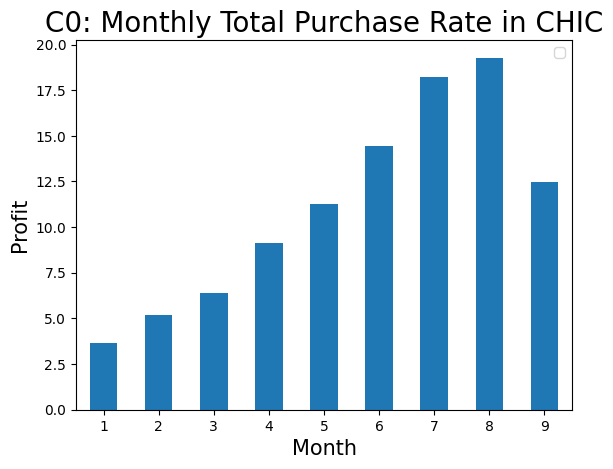

In [ ]:
chic_0_purchase_ratio.T.plot.bar()

plt.title("C0: Monthly Total Purchase Rate in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (2) 주문횟수로 본 월별 구매율

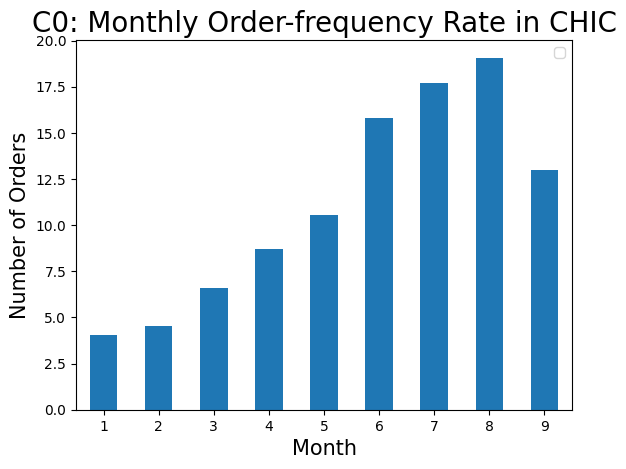

In [ ]:
def Chicago_0_cluster_order(x):
  mask = Chicago_0_cluster['월'] == x
  data = Chicago_0_cluster[mask]['거래ID'].nunique() / Chicago_0_cluster['거래ID'].nunique() * 100
  return round(data, 2)

Chicago_0_cluster_order_all = [Chicago_0_cluster_order(month) for month in range(1, 10)]
Chicago_0_cluster_order_all_df = pd.DataFrame(Chicago_0_cluster_order_all, index=(i for i in range(1,10)))
Chicago_0_cluster_order_all_df

Chicago_0_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C0: Monthly Order-frequency Rate in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

- 전체적인 금액 비율과 비슷한 추이를 보이는 주문횟수.
- **3월에 살짝 반등**했지만, 결국 그것이 **지속적인 추이로는 이어지지 못했다**.

#### (3) 한달 내 재구매율

In [ ]:
Chicago_0_cluster["거래날짜"].min(), Chicago_0_cluster["거래날짜"].max()

('2019-01-01', '2019-09-19')

In [ ]:
chicago_re = Chicago_0_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")
chicago_re

,기준연월,고객ID
0,2019-01,USER_0066
21,2019-01,USER_0351
56,2019-01,USER_1424
114,2019-01,USER_1236
129,2019-01,USER_1389
...,...,...
14839,2019-09,USER_0053
14865,2019-09,USER_0761
14905,2019-09,USER_0333
14949,2019-09,USER_0511


In [ ]:
list(chicago_re['기준연월'].unique())

['2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05',
 '2019-06',
 '2019-07',
 '2019-08',
 '2019-09']

In [ ]:
loop_list = list(chicago_re['기준연월'].unique())   # loop_list =  ['2019-01', '2019-02', '2019-03', '2019-04']
chic_cluster_0_re_all = []

for i in loop_list:
  c0_left = chicago_re[chicago_re['기준연월'] == i]
  bsym_1m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')  # 2019-01 + 1달 -> 2019-02 를 string 타입으로 변경
  c0_right = pd.DataFrame(chicago_re[chicago_re['기준연월'] == bsym_1m]['고객ID'].unique())  # 데이터프레임
  c0_right['target'] = 1
  c0_right.columns= ['고객ID', 'target']
  c0_merge = pd.merge(c0_left, c0_right, how='left')
  c0_merge['target'] = c0_merge['target'].fillna(0)

  chic_cluster_0_re_all.append(c0_merge)

chic_cluster_0_re_all = pd.concat(chic_cluster_0_re_all)

In [ ]:
# 열만 하나 늘어나야 정상
chic_cluster_0_re_all.shape, chicago_re.shape

((257, 3), (257, 2))

In [ ]:
chic_repurchase = chic_cluster_0_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
chic_repurchase.columns = ['기준연월', 'Y', 'Total']
chic_repurchase['ratio'] = chic_repurchase['Y']/chic_repurchase['Total']
chic_repurchase = chic_repurchase.iloc[0:11, :]

- 재구매율 용어 정리 <br>
Y = "다음달에도 재구매한 사용자 수" <br>
ratio = "다음달에도 재구매한 비율" <br>
total = "해당 월 거래 횟수"

In [ ]:
chic_repurchase

,기준연월,Y,Total,ratio
0,2019-01,1.0,11,0.090909
1,2019-02,0.0,8,0.000000
2,2019-03,2.0,18,0.111111
3,2019-04,3.0,26,0.115385
4,2019-05,5.0,25,0.200000
5,2019-06,6.0,47,0.127660
6,2019-07,7.0,41,0.170732
7,2019-08,3.0,54,0.055556
8,2019-09,0.0,27,0.000000


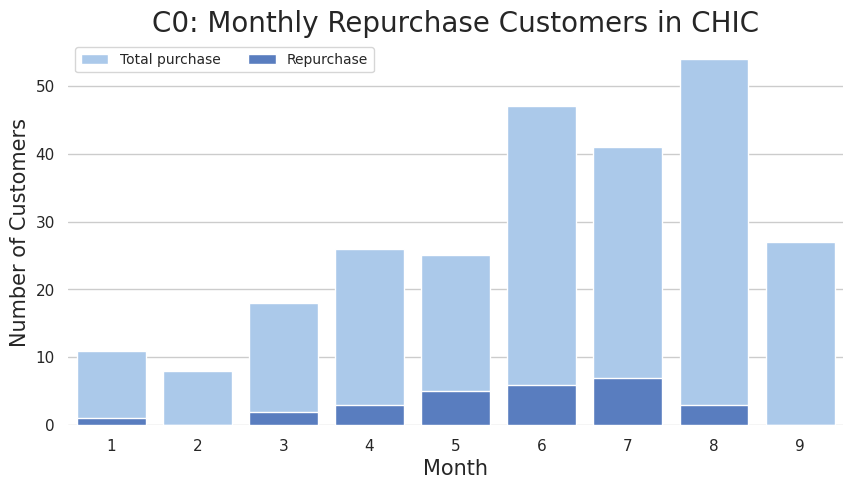

In [ ]:
# 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
chic_repurchase['기준연월'] = [i for i in range(1, 10)]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=chic_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=chic_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C0: Monthly Repurchase Customers in CHIC", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')

axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

- 1회만 사고 이탈한 고객의 수가 더 많다는 것을 확인. <br>
 -> 해당 클러스터는 월별 재구매자율만을 위해 타케팅 하는 것 보다는, <br>
 1회 이상 구매자와 1회만 구매한 자들과의 차별적인 솔루션을 진행하는 것이 좋을 것 같다.

#### (4) 전체 기간의 재구매자 비율

In [ ]:
Chicago_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "Chicago"]

# 고객ID 별 거래날짜 테이블을 만들어, 주문횟수 확인
chi_order_cnt_df = pd.pivot_table(Chicago_0_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
chi_order_cnt_df = chi_order_cnt_df.fillna(0)

In [ ]:
N = len(chi_order_cnt_df.index) # 인덱스 개수 (0번 클러스터의 고객)
re = []
for i in range(N):
  row = chi_order_cnt_df.iloc[i]  # 0번행 뽑음
  r = row.values  # 0번 행의 값들만 리스트로 뽑음 r = [0,0,0,0,1,0, 10, ...]
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break    # cnt가 2번 이상이면 재구매한거니까 빠져나옴
    elif num >= 1 :
      cnt += 1  # num (구매횟수) 가 1 이상이면 해당날짜에 구매한것으로 간주해 +1
    elif num == 0:
      continue   # num 이 0 이면 해당날짜는 구매 안한것으로 간주. cnt 추가 안하고 계속 for문 진행

  if cnt == 2: # 만약, (cnt=2) 2번 이상 구매했다면, 재구매자로 1을 부여
    cnt = 1
    re.append(cnt)
  elif cnt == 1:  # 만약, 1번만 구매했다면, 0으로 부여
    cnt = 0
    re.append(cnt)

cago_0_re_ratio = sum(re) /N * 100
print("chicago 재구매자 비율 : ", cago_0_re_ratio)   # 0번 클러스터의 시카고 고객들의 재구매율 = 재구매자 / 전체 고객수 * 100

chicago 재구매자 비율 :  47.239263803680984


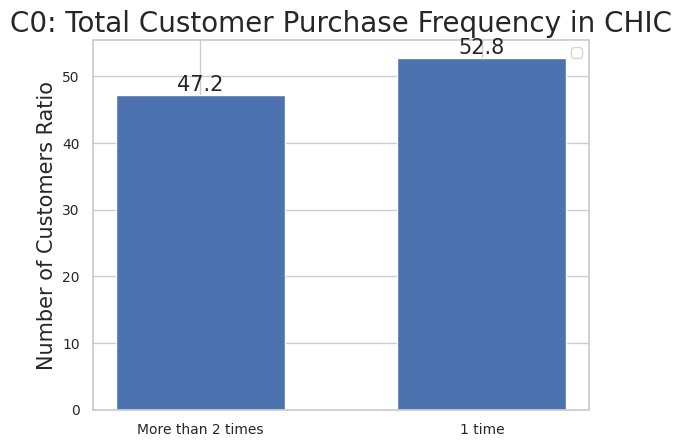

In [ ]:
x = ["More than 2 times", "1 time"]
y = [cago_0_re_ratio, 100- cago_0_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C0: Total Customer Purchase Frequency in CHIC", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()

- 밑에서 쓸 합친 표 미리 만들어놓기

In [ ]:
# 재구매율 데이터 프레임

repur_df = pd.DataFrame(
    index = ["California", "Chicago", "New Jersey", "New York", "Washington DC"],
    columns = ["재구매자 비율"]
)

In [ ]:
repur_df.loc["Chicago"] = cago_0_re_ratio
repur_df

,재구매자 비율
California,NaN
Chicago,47.239264
New Jersey,NaN
New York,NaN
Washington DC,NaN


### 1-1-2. 선호 품목

In [ ]:
# 주문수량 기준
# 시카고 사람들의 주문 중, 주문수량 많은 카테고리 5개 고르기
chic_categ_quant_top5_index = Chicago_0_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]

# 가장 많이 산 카테고리 5개만 뽑은 전체 지표
chic_categ_quant_top5_df = Chicago_0_cluster[Chicago_0_cluster["제품카테고리"].isin(chic_categ_quant_top5_index)]

# 기준연 별 카테고리 별 주문 수량 확인
chic_categ_quant_top5_pt = pd.pivot_table(
    chic_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
chic_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,53,40,4,81,86
2019-02,107,195,145,88,299
2019-03,197,87,177,102,669
2019-04,404,142,68,149,512
2019-05,411,264,157,179,945
2019-06,342,466,434,279,1656
2019-07,500,696,480,327,1157
2019-08,654,1110,540,274,1480
2019-09,348,910,650,197,936


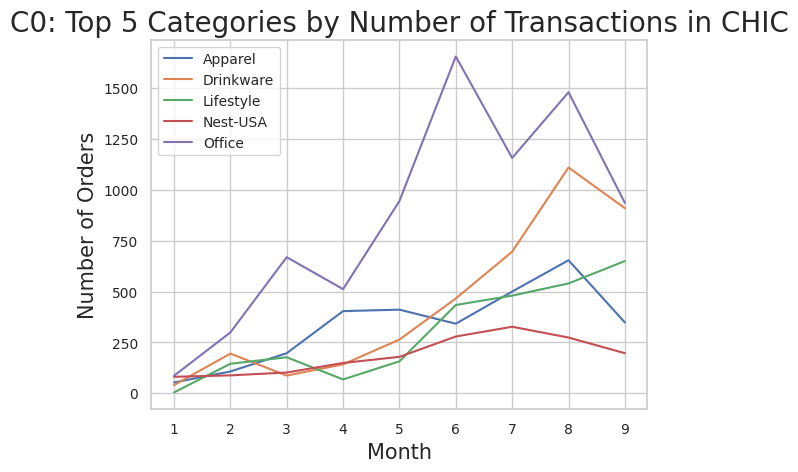

In [ ]:
for col in chic_categ_quant_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1,10)], chic_categ_quant_top5_pt[col], label = col)

plt.title("C0: Top 5 Categories by Number of Transactions in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# 주문횟수
chic_categ_ordercnt_top5_index = Chicago_0_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

chic_categ_ordercnt_top5_df = Chicago_0_cluster[Chicago_0_cluster["제품카테고리"].isin(chic_categ_ordercnt_top5_index)]

chic_categ_ordercnt_top5_pt = pd.pivot_table(
    chic_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)

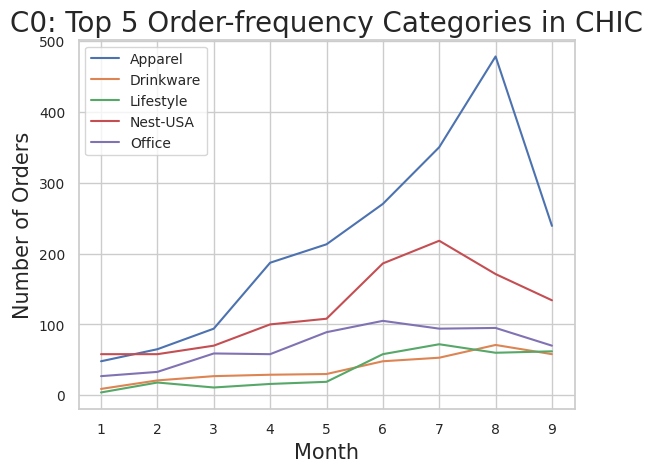

In [ ]:
for col in chic_categ_ordercnt_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1, 10)], chic_categ_ordercnt_top5_pt[col], label=col)

plt.title("C0: Top 5 Order-frequency Categories in CHIC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-1-3. 카테고리별 쿠폰 사용

In [ ]:
chic_categ_ordercnt_top5_df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,기준연월,...,GST,쿠폰코드,할인율,cluster_number,구매가격,부가세,소비자부담가격,쿠폰사용라벨링,monetary,쿠폰 미적용 비용
0,USER_0066,Transaction_0009,2019-01-01,Product_0185,Office,1,2.47,102.79,Used,2019-01,...,0.10,OFF10,10.0,0,2.47,0.2223,105.5070,1,2.223,2.47
1,USER_0066,Transaction_0009,2019-01-01,Product_0879,Drinkware,26,8.72,102.79,Clicked,2019-01,...,0.18,EXTRA10,10.0,0,226.72,40.8096,370.3196,0,226.720,226.72
2,USER_0066,Transaction_0009,2019-01-01,Product_0904,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
3,USER_0066,Transaction_0009,2019-01-01,Product_1134,Office,1,1.64,102.79,Clicked,2019-01,...,0.10,OFF10,10.0,0,1.64,0.1640,104.5940,0,1.640,1.64
5,USER_0066,Transaction_0010,2019-01-01,Product_0677,Apparel,1,61.89,6.50,Clicked,2019-01,...,0.18,SALE10,10.0,0,61.89,11.1402,79.5302,0,61.890,61.89


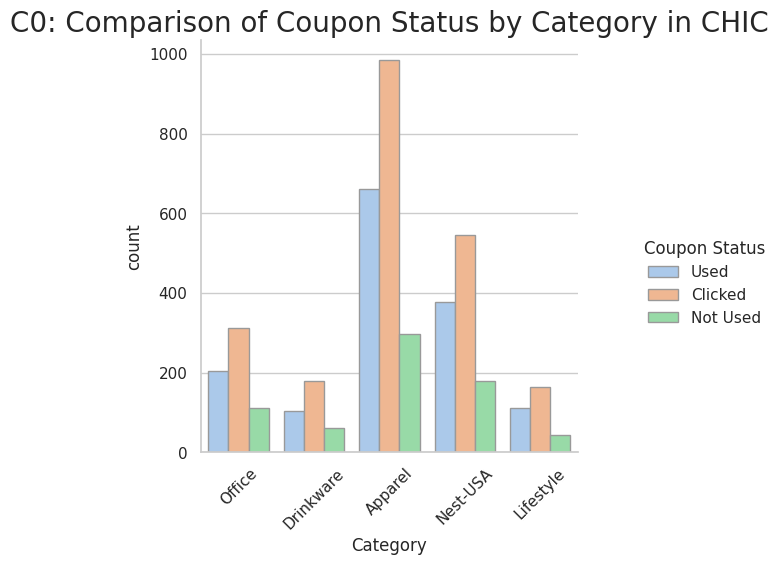

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=chic_categ_ordercnt_top5_df)

# 글자 크기 조정
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C0: Comparison of Coupon Status by Category in CHIC')
plt.show()

## 1-2. 캘리포니아

### 1-2-1. 월별 구매분석

#### (1) 월별 전체 구매율 비교
- 전체 구매금액에서 월별 구매금액이 차지하는 비중
- 월별 구매금액 / 전체금액 * 100

In [ ]:
# 켈리포니아 고객들의 전체 구매 금액
cali_0_purchase_amt = cluster_0_total_price[cluster_0_total_price["고객지역"]=="California"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

# for문으로 데이터프레임에 월별 캘리포니아 사람들의 구매 금액 넣기

l = []
for i in range(1, cluster_0_total_price["월"].nunique() + 1 ):
  month = cluster_0_total_price[cluster_0_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "California"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  cali_0_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
cali_0_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9
고객지역,,,,,,,,,,
California,353214.54808,25502.0337,3825.47434,30380.54761,16315.47717,44320.6157,53482.91555,65543.37495,81054.4237,32789.68536


In [ ]:
# 비율 데이터프레임 뼈대 만들기
cali_0_purchase_ratio = pd.DataFrame(index = ["California"])

# for문으로 월별 비율 컬럼 넣기
for i in range(1, cluster_0_total_price["월"].nunique()+1):
  p = cali_0_purchase_amt[f"{i}"]
  cali_0_purchase_ratio[f"{i}"] = p / cali_0_purchase_amt["전체 구매금액"] * 100

In [ ]:
cali_0_purchase_ratio

,1,2,3,4,5,6,7,8,9
California,7.219984,1.083046,8.60116,4.619141,12.547789,15.141765,18.55625,22.947646,9.283221


**시각화**

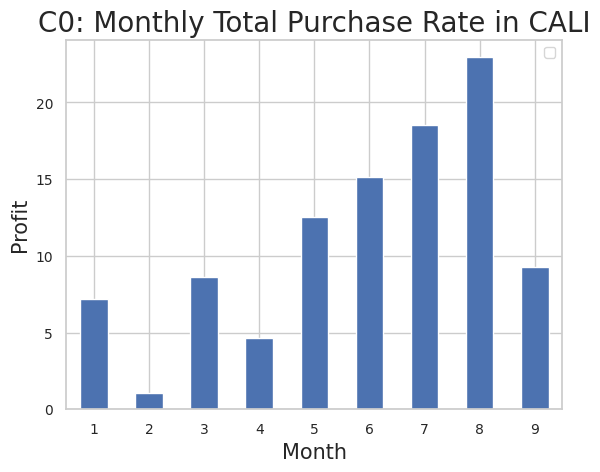

In [ ]:
cali_0_purchase_ratio.T.plot.bar()

plt.title("C0: Monthly Total Purchase Rate in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (2) 주문횟수로 본 월별 구매율

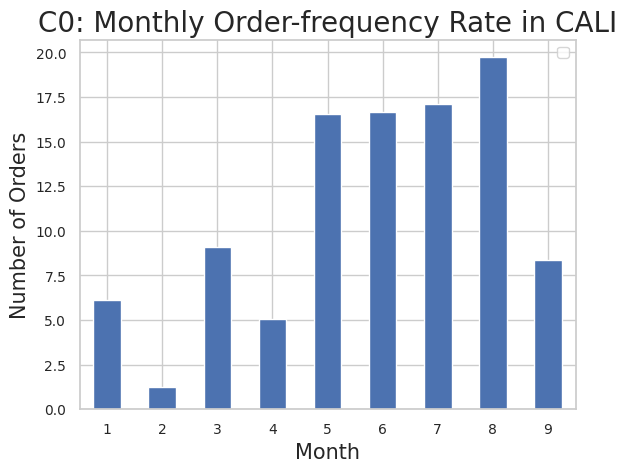

In [ ]:
def California_0_cluster_order(x):
  mask = California_0_cluster['월'] == x
  data = California_0_cluster[mask]['거래ID'].nunique() / California_0_cluster['거래ID'].nunique() * 100
  return round(data, 2)

California_0_cluster_order_all = [California_0_cluster_order(month) for month in range(1, 10)]
California_0_cluster_order_all_df = pd.DataFrame(California_0_cluster_order_all, index=(i for i in range(1,10)))
California_0_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C0: Monthly Order-frequency Rate in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (3) 한달 내 재구매율

In [ ]:
# 캘리포니아만 데이터프레임 추출
California_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "California"]

# 필요한 칼럼만 추출 후 고유값만 남기기
california_re = California_0_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")

In [ ]:
loop_list = list(california_re['기준연월'].unique())   # loop_list =  ['2019-01', '2019-02', '2019-03', '2019-04']
calif_cluster_0_re_all = []

for i in loop_list:
  c0_left = california_re[california_re['기준연월'] == i]
  bsym_1m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')  # 2019-01 + 1달 -> 2019-02 를 string 타입으로 변경
  c0_right = pd.DataFrame(california_re[california_re['기준연월'] == bsym_1m]['고객ID'].unique())  # 데이터프레임
  c0_right['target'] = 1
  c0_right.columns= ['고객ID', 'target']
  c0_merge = pd.merge(c0_left, c0_right, how='left')
  c0_merge['target'] = c0_merge['target'].fillna(0)

  calif_cluster_0_re_all.append(c0_merge)

calif_cluster_0_re_all = pd.concat(calif_cluster_0_re_all)

In [ ]:
calif_cluster_0_re_all.shape, california_re.shape

((264, 3), (264, 2))

In [ ]:
calif_repurchase = calif_cluster_0_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
calif_repurchase.columns = ['기준연월', 'Y', 'Total']
calif_repurchase['ratio'] = calif_repurchase['Y']/calif_repurchase['Total']
calif_repurchase = calif_repurchase.iloc[0:11, :]

In [ ]:
calif_repurchase

,기준연월,Y,Total,ratio
0,2019-01,0.0,16,0.000000
1,2019-02,0.0,3,0.000000
2,2019-03,3.0,21,0.142857
3,2019-04,4.0,19,0.210526
4,2019-05,5.0,29,0.172414
5,2019-06,6.0,49,0.122449
6,2019-07,12.0,45,0.266667
7,2019-08,5.0,56,0.089286
8,2019-09,0.0,26,0.000000


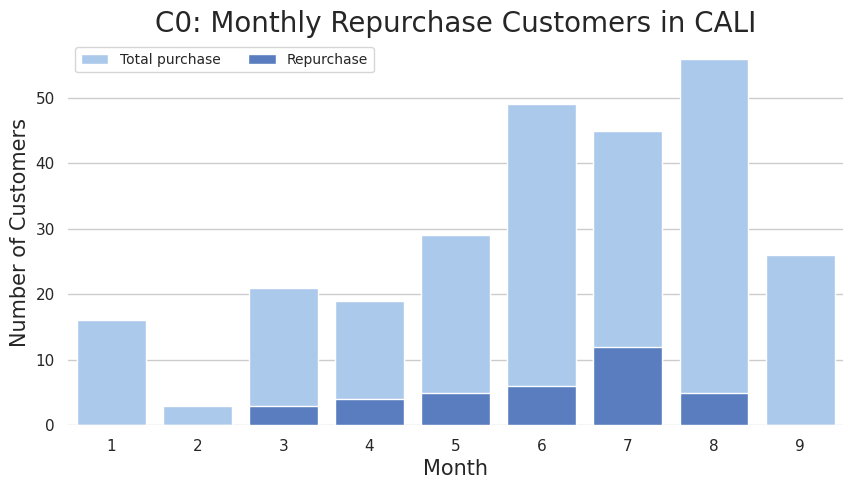

In [ ]:
# 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
calif_repurchase['기준연월'] = [i for i in range(1, 10)]
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=calif_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=calif_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C0: Monthly Repurchase Customers in CALI", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

#### (4) 전체 기간의 재구매자 비율

In [ ]:
California_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "California"]

cal_reorder_cnt_df = pd.pivot_table(California_0_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
cal_reorder_cnt_df = cal_reorder_cnt_df.fillna(0)


N = len(cal_reorder_cnt_df.index)
re = []
for i in range(N):
  row = cal_reorder_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

ca_0_re_ratio = sum(re) /N * 100
print("california 재구매율 : ", ca_0_re_ratio)

california 재구매율 :  48.148148148148145


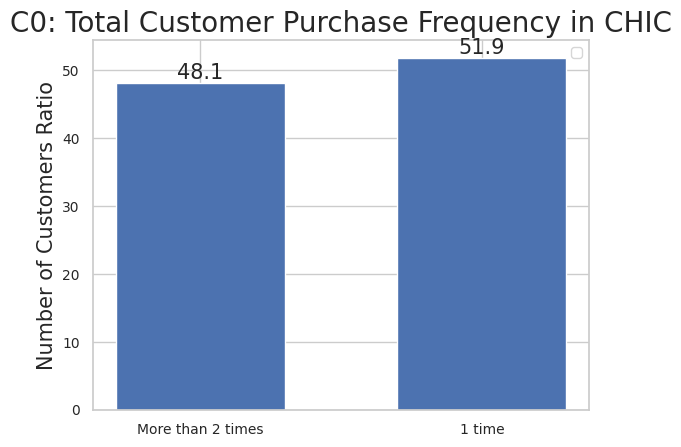

In [ ]:
x = ["More than 2 times", "1 time"]
y = [ca_0_re_ratio, 100- ca_0_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C0: Total Customer Purchase Frequency in CHIC", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()

In [ ]:
repur_df.loc["California"] = ca_0_re_ratio
repur_df

,재구매자 비율
California,48.148148
Chicago,47.239264
New Jersey,NaN
New York,NaN
Washington DC,NaN


### 1-2-2. 선호 품목

In [ ]:
# 주문수량 기준
# 캘리포니아 사람들의 주문 중, 주문수량 많은 카테고리 5개 고르기
cali_categ_quant_top5_index = California_0_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]

# 가장 많이 산 카테고리 5개만 뽑은 전체 지표
cali_categ_quant_top5_df = California_0_cluster[California_0_cluster["제품카테고리"].isin(cali_categ_quant_top5_index)]

# 기준연원 별 카테고리 별 주문 수량 확인
cali_categ_quant_top5_pt = pd.pivot_table(
    cali_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
cali_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Notebooks & Journals,Office
기준연월,,,,,
2019-01,77,146,34,6,517
2019-02,6,13,6,13,146
2019-03,113,251,67,15,571
2019-04,83,12,50,2,180
2019-05,336,235,373,76,1146
2019-06,368,254,250,105,754
2019-07,934,280,489,177,669
2019-08,590,288,361,1279,1073
2019-09,604,301,143,128,342


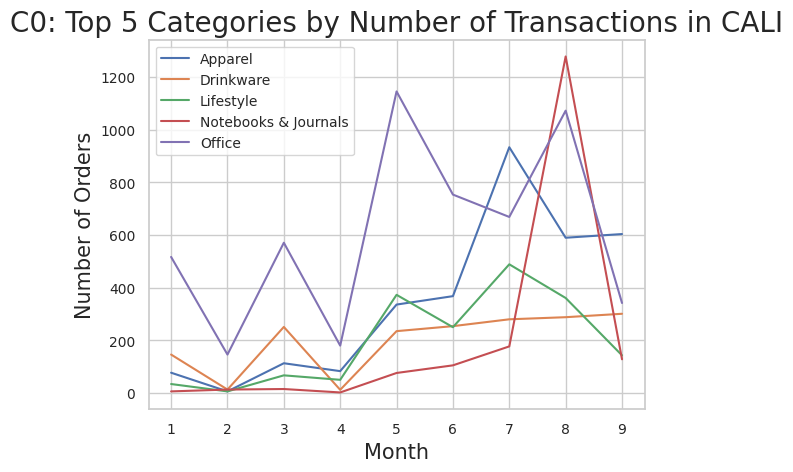

In [ ]:
for col in cali_categ_quant_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1,10)], cali_categ_quant_top5_pt[col], label = col)

plt.title("C0: Top 5 Categories by Number of Transactions in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# 주문횟수 기준
cali_categ_ordercnt_top5_index = California_0_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

cali_categ_ordercnt_top5_df = California_0_cluster[California_0_cluster["제품카테고리"].isin(cali_categ_ordercnt_top5_index)]

cali_categ_ordercnt_top5_pt = pd.pivot_table(
    cali_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)

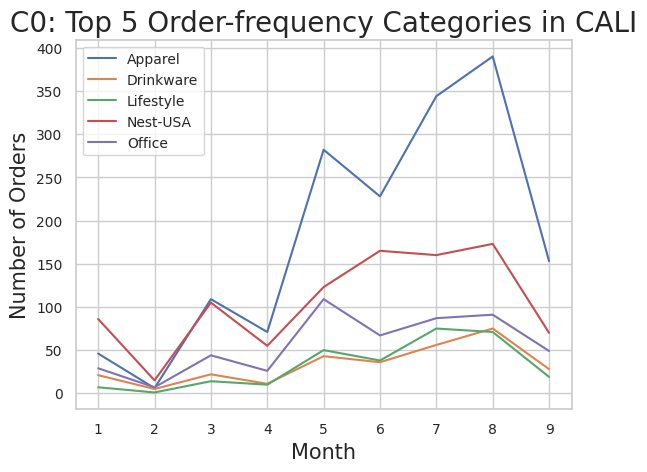

In [ ]:
for col in cali_categ_ordercnt_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1, 10)], cali_categ_ordercnt_top5_pt[col], label=col)

plt.title("C0: Top 5 Order-frequency Categories in CALI", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-2-3. 카테고리별 쿠폰 사용

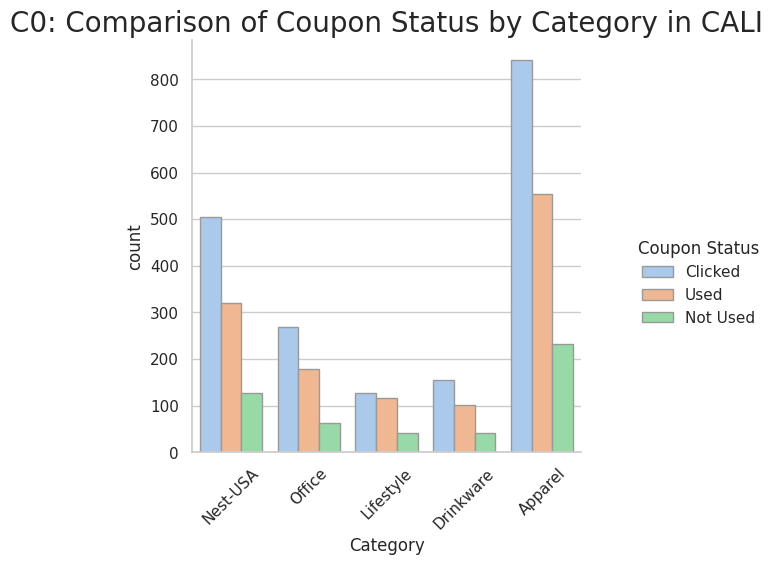

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6", data=cali_categ_ordercnt_top5_df);

# 글자 크기 조정
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C0: Comparison of Coupon Status by Category in CALI')
plt.show()

## 1-3. 뉴저지

### 1-3-1. 월별 구매분석

#### (1) 월별 전체 구매율 비교
- 전체 구매금액에서 월별 구매금액이 차지하는 비중
- 월별 구매금액 / 전체금액 * 100

In [ ]:
# 뉴저지 고객들의 전체 구매 금액
nj_0_purchase_amt = cluster_0_total_price[cluster_0_total_price["고객지역"]=="New Jersey"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

# for문으로 데이터프레임에 월별 캘리포니아 사람들의 구매 금액 넣기

l = []
for i in range(1, cluster_0_total_price["월"].nunique() + 1 ):
  month = cluster_0_total_price[cluster_0_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "New Jersey"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  nj_0_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
nj_0_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9
고객지역,,,,,,,,,,
New Jersey,109173.91855,4843.65586,6725.72906,5312.45536,4573.49589,12653.43932,29505.2834,9618.41044,18116.27926,17825.16996


In [ ]:
# 비율 데이터프레임 뼈대 만들기
nj_0_purchase_ratio = pd.DataFrame(index = ["New Jersey"])

# for문으로 월별 비율 컬럼 넣기
for i in range(1, cluster_0_total_price["월"].nunique()+1):
  p = nj_0_purchase_amt[f"{i}"]
  nj_0_purchase_ratio[f"{i}"] = p / nj_0_purchase_amt["전체 구매금액"] * 100

In [ ]:
nj_0_purchase_ratio

,1,2,3,4,5,6,7,8,9
New Jersey,4.436642,6.160564,4.866048,4.189184,11.590167,27.025945,8.810172,16.593963,16.327315


**시각화**

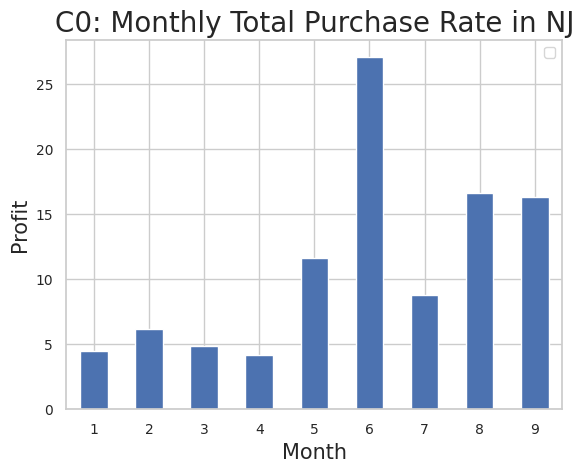

In [ ]:
nj_0_purchase_ratio.T.plot.bar()

plt.title("C0: Monthly Total Purchase Rate in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (2) 주문횟수로 본 월별 구매율

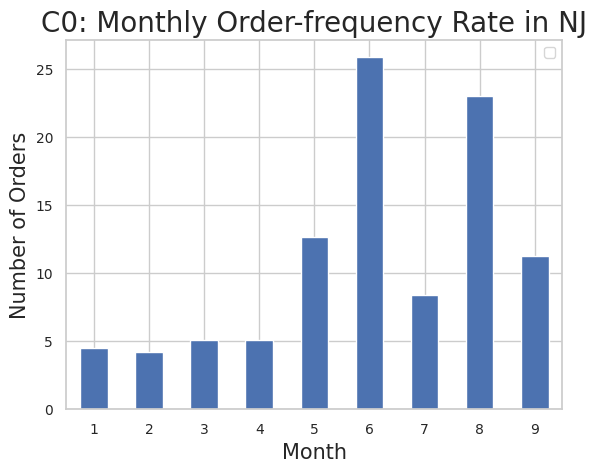

In [ ]:
def NewJersey_0_cluster_order(x):
  mask = NewJersey_0_cluster['월'] == x
  data = NewJersey_0_cluster[mask]['거래ID'].nunique() / NewJersey_0_cluster['거래ID'].nunique() * 100
  return round(data, 2)

NewJersey_0_cluster_order_all = [NewJersey_0_cluster_order(month) for month in range(1, 10)]
NewJersey_0_cluster_order_all_df = pd.DataFrame(NewJersey_0_cluster_order_all, index=(i for i in range(1,10)))
NewJersey_0_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C0: Monthly Order-frequency Rate in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (3) 한달 내 재구매율

In [ ]:
# 뉴저지 데이터프레임 추출
NewJersey_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "New Jersey"]

# 필요한 칼럼만 추출 후 고유값만 남기기
newjsy_re = NewJersey_0_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")

In [ ]:
loop_list = list(newjsy_re['기준연월'].unique())   # loop_list =  ['2019-01', '2019-02', '2019-03', '2019-04']
newjsy_cluster_0_re_all = []

for i in loop_list:
  c0_left = newjsy_re[newjsy_re['기준연월'] == i]
  bsym_1m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')  # 2019-01 + 1달 -> 2019-02 를 string 타입으로 변경
  c0_right = pd.DataFrame(newjsy_re[newjsy_re['기준연월'] == bsym_1m]['고객ID'].unique())  # 데이터프레임
  c0_right['target'] = 1
  c0_right.columns= ['고객ID', 'target']
  c0_merge = pd.merge(c0_left, c0_right, how='left')
  c0_merge['target'] = c0_merge['target'].fillna(0)

  newjsy_cluster_0_re_all.append(c0_merge)

newjsy_cluster_0_re_all = pd.concat(newjsy_cluster_0_re_all)

In [ ]:
newjsy_cluster_0_re_all.shape, newjsy_re.shape

((76, 3), (76, 2))

In [ ]:
newjsy_repurchase = newjsy_cluster_0_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
newjsy_repurchase.columns = ['기준연월', 'Y', 'Total']
newjsy_repurchase['ratio'] = newjsy_repurchase['Y']/newjsy_repurchase['Total']
newjsy_repurchase = newjsy_repurchase.iloc[0:11, :]

In [ ]:
newjsy_repurchase

,기준연월,Y,Total,ratio
0,2019-01,0.0,3,0.000000
1,2019-02,0.0,3,0.000000
2,2019-03,1.0,4,0.250000
3,2019-04,2.0,4,0.500000
4,2019-05,1.0,8,0.125000
5,2019-06,1.0,15,0.066667
6,2019-07,2.0,10,0.200000
7,2019-08,0.0,18,0.000000
8,2019-09,0.0,11,0.000000


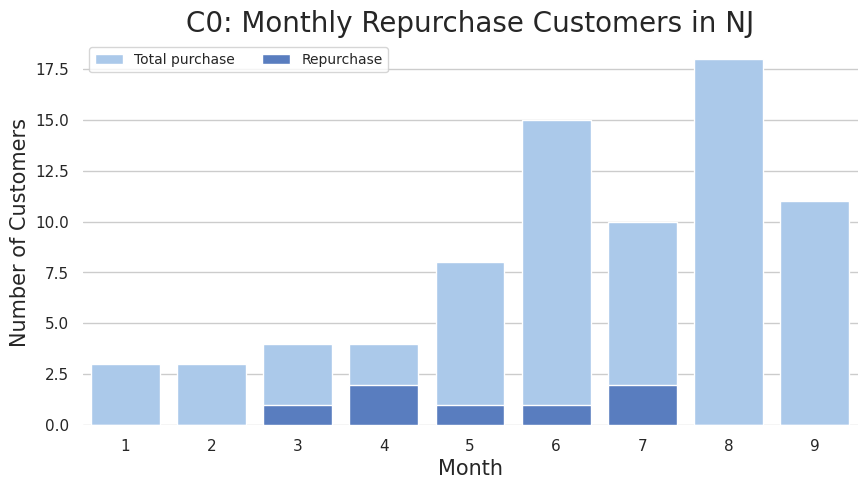

In [ ]:
# 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
newjsy_repurchase['기준연월'] = [i for i in range(1, 10)]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=newjsy_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=newjsy_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C0: Monthly Repurchase Customers in NJ", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

#### (4) 전체기간의 재구매자 비율

In [ ]:
NewJersey_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "New Jersey"]

new_order_cnt_df = pd.pivot_table(NewJersey_0_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
new_order_cnt_df = new_order_cnt_df.fillna(0)


N = len(new_order_cnt_df.index)
re = []
for i in range(N):
  row = new_order_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

nj_0_re_ratio = sum(re) /N * 100
print("new jersey 재구매율 : ", nj_0_re_ratio)

new jersey 재구매율 :  42.592592592592595


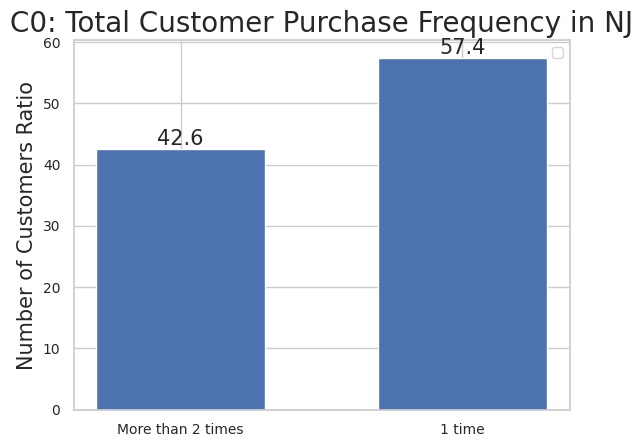

In [ ]:
x = ["More than 2 times", "1 time"]
y = [nj_0_re_ratio, 100- nj_0_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C0: Total Customer Purchase Frequency in NJ", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()

In [ ]:
repur_df.loc["New Jersey"] = nj_0_re_ratio
repur_df

,재구매자 비율
California,48.148148
Chicago,47.239264
New Jersey,42.592593
New York,NaN
Washington DC,NaN


### 1-3-2. 선호 품목

In [ ]:
# 주문수량 기준
# 뉴저지 사람들의 주문 중, 주문수량 많은 카테고리 5개 고르기
nj_categ_quant_top5_index = NewJersey_0_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]

# 가장 많이 산 카테고리 5개만 뽑은 전체 지표
nj_categ_quant_top5_df = NewJersey_0_cluster[NewJersey_0_cluster["제품카테고리"].isin(nj_categ_quant_top5_index)]

# 기준연원 별 카테고리 별 주문 수량 확인
nj_categ_quant_top5_pt = pd.pivot_table(
    nj_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
nj_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,27.0,16.0,32.0,22.0,92.0
2019-02,23.0,25.0,27.0,44.0,44.0
2019-03,22.0,32.0,26.0,29.0,56.0
2019-04,36.0,6.0,NaN,11.0,6.0
2019-05,82.0,68.0,113.0,73.0,87.0
2019-06,173.0,617.0,525.0,134.0,988.0
2019-07,104.0,62.0,7.0,39.0,194.0
2019-08,200.0,191.0,82.0,82.0,575.0
2019-09,455.0,79.0,207.0,56.0,404.0


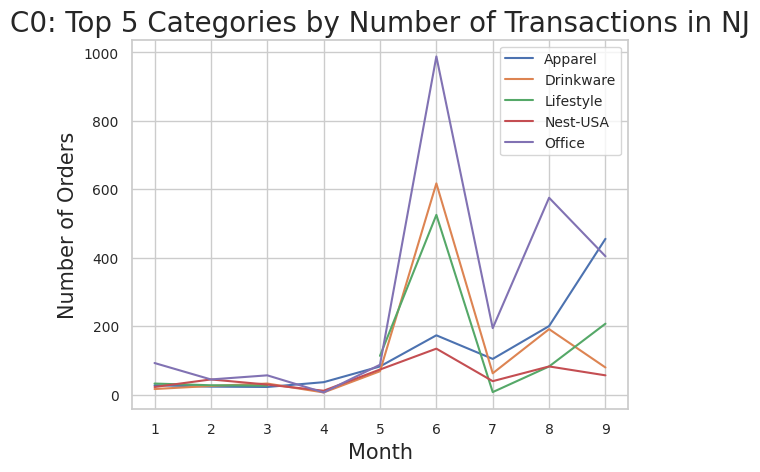

In [ ]:
for col in nj_categ_quant_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1,10)], nj_categ_quant_top5_pt[col], label = col)

plt.title("C0: Top 5 Categories by Number of Transactions in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# 주문횟수
nj_categ_ordercnt_top5_index = NewJersey_0_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

nj_categ_ordercnt_top5_df = NewJersey_0_cluster[NewJersey_0_cluster["제품카테고리"].isin(nj_categ_ordercnt_top5_index)]

nj_categ_ordercnt_top5_pt = pd.pivot_table(
    nj_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)
nj_categ_ordercnt_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,23.0,5.0,5.0,16.0,12.0
2019-02,19.0,5.0,2.0,25.0,3.0
2019-03,18.0,5.0,3.0,18.0,6.0
2019-04,36.0,6.0,0.0,9.0,5.0
2019-05,74.0,8.0,8.0,48.0,9.0
2019-06,155.0,16.0,10.0,98.0,41.0
2019-07,63.0,8.0,7.0,32.0,14.0
2019-08,162.0,25.0,19.0,60.0,16.0
2019-09,82.0,13.0,19.0,35.0,27.0


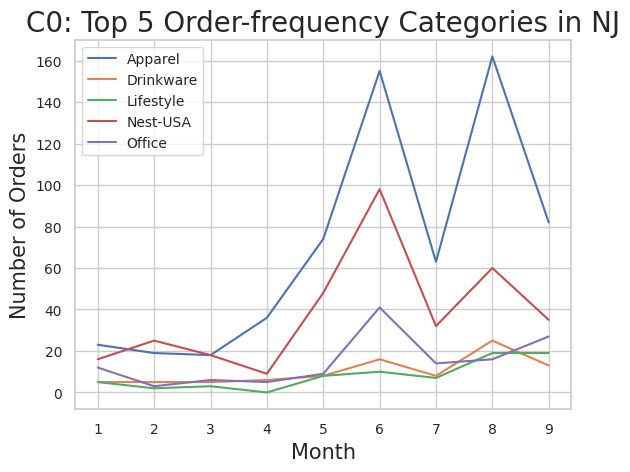

In [ ]:
for col in nj_categ_ordercnt_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1, 10)], nj_categ_ordercnt_top5_pt[col], label=col)

plt.title("C0: Top 5 Order-frequency Categories in NJ", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-3-3. 카테고리별 쿠폰 사용

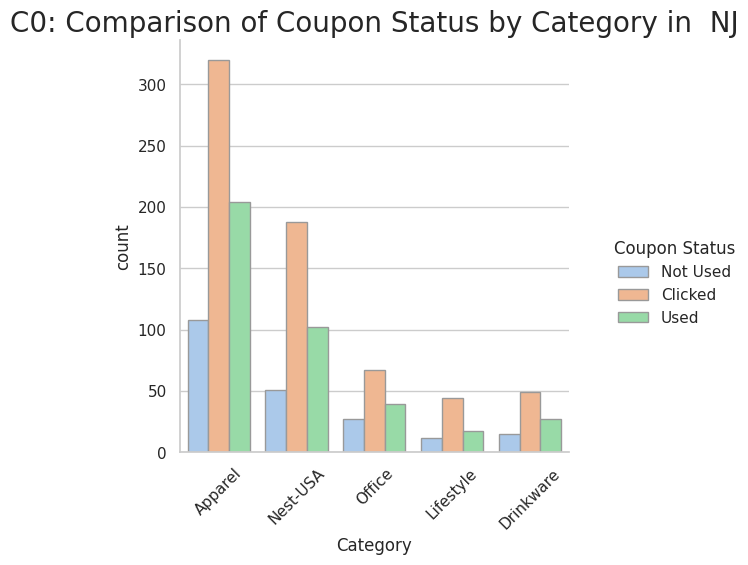

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=nj_categ_ordercnt_top5_df);

# 글자 크기 조정
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C0: Comparison of Coupon Status by Category in  NJ')
plt.show()

## 1-4. 뉴욕

### 1-4-1. 월별 구매 분석

#### (1) 월별 전체 구매율 비교
- 전체 구매금액에서 월별 구매금액이 차지하는 비중
- 월별 구매금액 / 전체금액 * 100

In [ ]:
# 뉴욕 고객들의 전체 구매 금액
ny_0_purchase_amt = cluster_0_total_price[cluster_0_total_price["고객지역"]=="New York"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

# for문으로 데이터프레임에 월별 캘리포니아 사람들의 구매 금액 넣기

l = []
for i in range(1, cluster_0_total_price["월"].nunique() + 1 ):
  month = cluster_0_total_price[cluster_0_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "New York"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  ny_0_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
ny_0_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9
고객지역,,,,,,,,,,
New York,304542.86022,26894.28974,15136.52428,29070.23469,6930.06087,33196.94834,43971.42998,72383.13253,49917.52654,27042.71325


In [ ]:
# 비율 데이터프레임 뼈대 만들기
ny_0_purchase_ratio = pd.DataFrame(index = ["New York"])

# for문으로 월별 비율 컬럼 넣기
for i in range(1, cluster_0_total_price["월"].nunique()+1):
  p = ny_0_purchase_amt[f"{i}"]
  ny_0_purchase_ratio[f"{i}"] = p / ny_0_purchase_amt["전체 구매금액"] * 100

In [ ]:
ny_0_purchase_ratio

,1,2,3,4,5,6,7,8,9
New York,8.831036,4.970244,9.545532,2.275562,10.900583,14.438503,23.767798,16.390969,8.879773


**시각화**

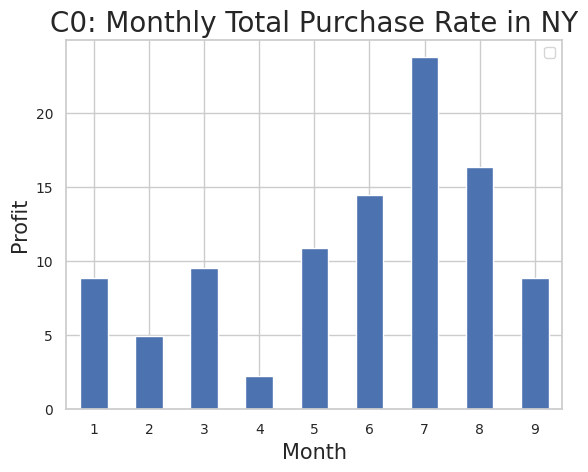

In [ ]:
ny_0_purchase_ratio.T.plot.bar()

plt.title("C0: Monthly Total Purchase Rate in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (2) 주문횟수로 본 월뵬 구매율

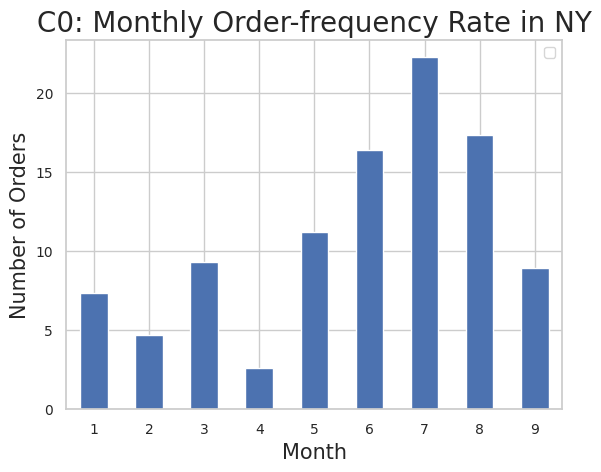

In [ ]:
def NewYork_0_cluster_order(x):
  mask = NewYork_0_cluster['월'] == x
  data = NewYork_0_cluster[mask]['거래ID'].nunique() / NewYork_0_cluster['거래ID'].nunique() * 100
  return round(data, 2)

NewYork_0_cluster_order_all = [NewYork_0_cluster_order(month) for month in range(1, 10)]
NewYork_0_cluster_order_all_df = pd.DataFrame(NewYork_0_cluster_order_all, index=(i for i in range(1,10)))
NewYork_0_cluster_order_all_df.transpose().T.plot.bar()

plt.title("C0: Monthly Order-frequency Rate in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (3) 한달 내 재구매율

In [ ]:
# 뉴욕만 데이터프레임 추출
NewYork_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "New York"]

# 필요한 칼럼만 추출 후 고유값만 남기기
ny_re = NewYork_0_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")

In [ ]:
loop_list = list(ny_re['기준연월'].unique())   # loop_list =  ['2019-01', '2019-02', '2019-03', '2019-04']
ny_cluster_0_re_all = []

for i in loop_list:
  c0_left = ny_re[ny_re['기준연월'] == i]
  bsym_1m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')  # 2019-01 + 1달 -> 2019-02 를 string 타입으로 변경
  c0_right = pd.DataFrame(ny_re[ny_re['기준연월'] == bsym_1m]['고객ID'].unique())  # 데이터프레임
  c0_right['target'] = 1
  c0_right.columns= ['고객ID', 'target']
  c0_merge = pd.merge(c0_left, c0_right, how='left')
  c0_merge['target'] = c0_merge['target'].fillna(0)

  ny_cluster_0_re_all.append(c0_merge)

ny_cluster_0_re_all = pd.concat(ny_cluster_0_re_all)

In [ ]:
ny_cluster_0_re_all.shape, ny_re.shape

((196, 3), (196, 2))

In [ ]:
newyork_repurchase = ny_cluster_0_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
newyork_repurchase.columns = ['기준연월', 'Y', 'Total']
newyork_repurchase['ratio'] = newyork_repurchase['Y']/newyork_repurchase['Total']
newyork_repurchase = newyork_repurchase.iloc[0:11, :]

In [ ]:
newyork_repurchase

,기준연월,Y,Total,ratio
0,2019-01,0.0,12,0.000000
1,2019-02,2.0,8,0.250000
2,2019-03,1.0,17,0.058824
3,2019-04,1.0,9,0.111111
4,2019-05,2.0,20,0.100000
5,2019-06,4.0,37,0.108108
6,2019-07,1.0,38,0.026316
7,2019-08,3.0,38,0.078947
8,2019-09,0.0,17,0.000000


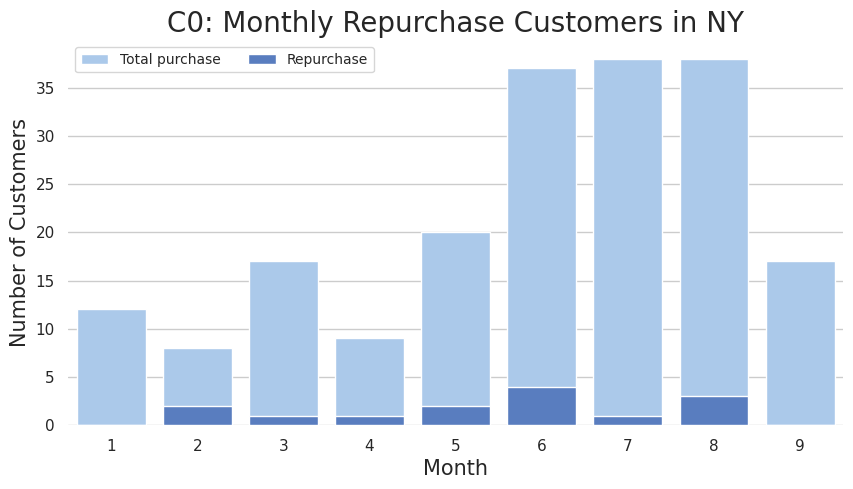

In [ ]:
# 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
newyork_repurchase['기준연월'] = [i for i in range(1, 10)]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=newyork_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=newyork_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C0: Monthly Repurchase Customers in NY", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

#### (4) 전체기간의 재구매자 비율
- new york 재구매율 :  25.0

In [ ]:
NewYork_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "New York"]

nyc_order_cnt_df = pd.pivot_table(NewYork_0_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
nyc_order_cnt_df = nyc_order_cnt_df.fillna(0)


N = len(nyc_order_cnt_df.index)
re = []
for i in range(N):
  row = nyc_order_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

ny_0_re_ratio = sum(re) /N * 100
print("new york 재구매율 : ", ny_0_re_ratio)

new york 재구매율 :  54.330708661417326


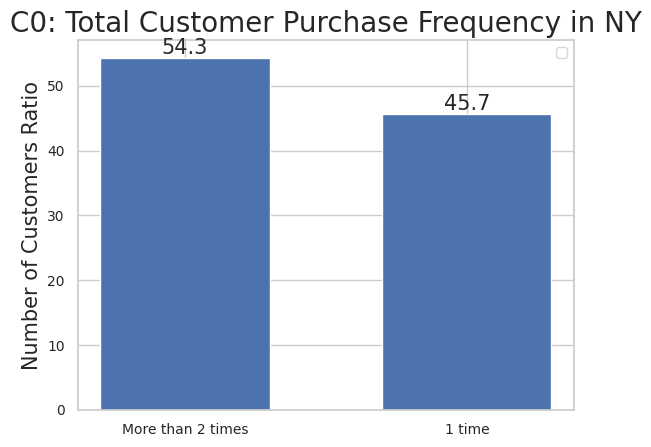

In [ ]:
x = ["More than 2 times", "1 time"]
y = [ny_0_re_ratio, 100- ny_0_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C0: Total Customer Purchase Frequency in NY", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()

In [ ]:
repur_df.loc["New York"] = ny_0_re_ratio
repur_df

,재구매자 비율
California,48.148148
Chicago,47.239264
New Jersey,42.592593
New York,54.330709
Washington DC,NaN


### 1-4-2. 선호 품목

In [ ]:
# 주문수량 기준
# 뉴욕 사람들의 주문 중, 주문수량 많은 카테고리 5개 고르기
ny_categ_quant_top5_index = NewYork_0_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]

# 가장 많이 산 카테고리 5개만 뽑은 전체 지표
ny_categ_quant_top5_df = NewYork_0_cluster[NewYork_0_cluster["제품카테고리"].isin(ny_categ_quant_top5_index)]

# 기준연원 별 카테고리 별 주문 수량 확인
ny_categ_quant_top5_pt = pd.pivot_table(
    ny_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
ny_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,142,149,154,130,473
2019-02,45,71,55,87,107
2019-03,142,90,276,153,1188
2019-04,43,19,14,36,105
2019-05,185,112,250,167,574
2019-06,288,288,481,213,758
2019-07,643,130,909,342,954
2019-08,552,494,308,222,1065
2019-09,189,191,184,144,232


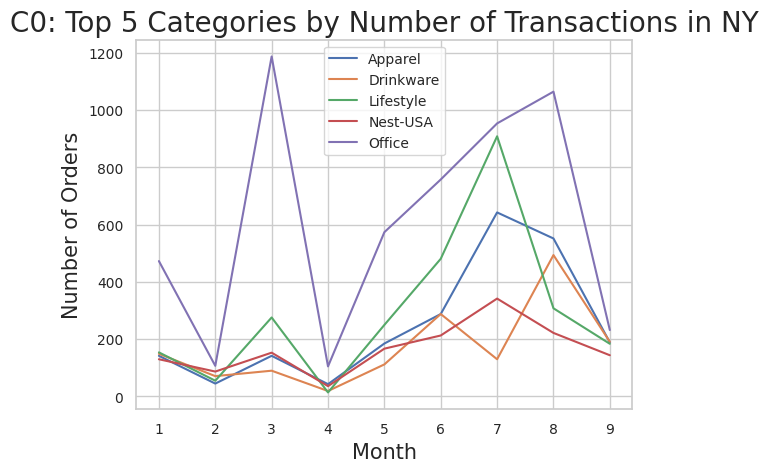

In [ ]:
for col in ny_categ_quant_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1,10)], ny_categ_quant_top5_pt[col], label = col)

plt.title("C0: Top 5 Categories by Number of Transactions in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1,10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# 주문횟수
ny_categ_ordercnt_top5_index = NewYork_0_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

ny_categ_ordercnt_top5_df = NewYork_0_cluster[NewYork_0_cluster["제품카테고리"].isin(ny_categ_ordercnt_top5_index)]

ny_categ_ordercnt_top5_pt = pd.pivot_table(
    ny_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)
ny_categ_ordercnt_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,86,15,17,90,47
2019-02,38,11,13,53,21
2019-03,103,20,19,96,32
2019-04,37,5,4,23,21
2019-05,165,24,33,116,64
2019-06,246,31,44,139,84
2019-07,368,36,51,221,81
2019-08,345,66,60,142,66
2019-09,125,29,38,92,49


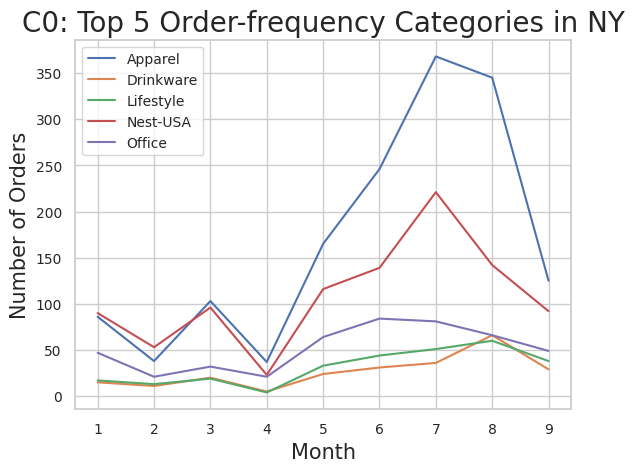

In [ ]:
for col in ny_categ_ordercnt_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([i for i in range(1, 10)], ny_categ_ordercnt_top5_pt[col], label=col)

plt.title("C0: Top 5 Order-frequency Categories in NY", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([i for i in range(1, 10)], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-4-3. 카테고리별 쿠폰 사용

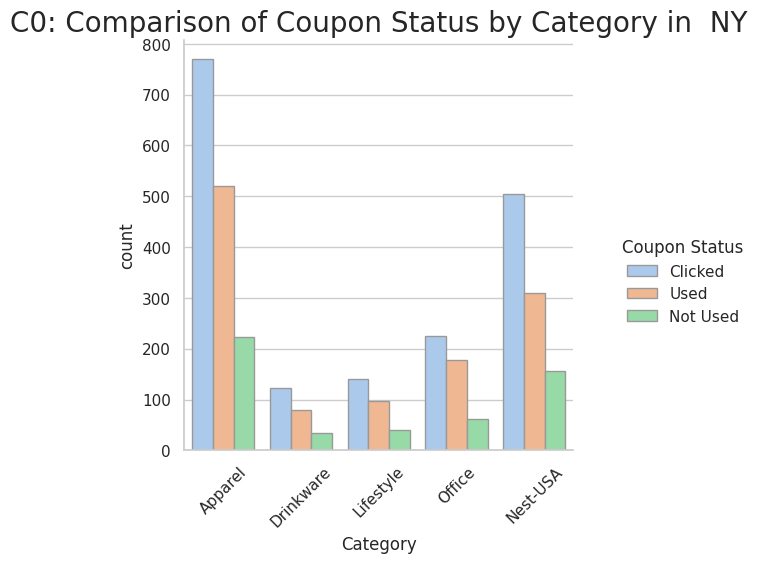

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=ny_categ_ordercnt_top5_df);

# 글자 크기 조정
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C0: Comparison of Coupon Status by Category in  NY')
plt.show()

## 1-5. 워싱턴 DC

### 1-5-1. 월별 구매 분석

#### (1) 월별 전체 구매율 비교
- 전체 구매금액에서 월별 구매금액이 차지하는 비중
- 월별 구매금액 / 전체금액 * 100

In [ ]:
# 뉴욕 고객들의 전체 구매 금액
wdc_0_purchase_amt = cluster_0_total_price[cluster_0_total_price["고객지역"]=="Washington DC"].groupby("고객지역")["소비자총부담가격"].agg([
    ("전체 구매금액" , sum)
])

# for문으로 데이터프레임에 월별 캘리포니아 사람들의 구매 금액 넣기

l = []
for i in range(1, cluster_0_total_price["월"].nunique() + 1 ):
  month = cluster_0_total_price[cluster_0_total_price["월"] == i ]

  r1 = month[month["고객지역"] == "Washington DC"]
  r1_s = r1["소비자총부담가격"].sum()
  l.append(r1_s)

  wdc_0_purchase_amt[f"{i}"] = l
  l = []

In [ ]:
wdc_0_purchase_amt

,전체 구매금액,1,2,3,4,5,6,7,8,9
고객지역,,,,,,,,,,
Washington DC,37409.02297,3878.00186,0.0,1202.98454,724.99813,5247.48584,4609.64793,12236.08081,9509.82386,0.0


In [ ]:
# 비율 데이터프레임 뼈대 만들기
wdc_0_purchase_ratio = pd.DataFrame(index = ["Washington DC"])

# for문으로 월별 비율 컬럼 넣기
for i in range(1, cluster_0_total_price["월"].nunique()+1):
  p = wdc_0_purchase_amt[f"{i}"]
  wdc_0_purchase_ratio[f"{i}"] = p / wdc_0_purchase_amt["전체 구매금액"] * 100

In [ ]:
wdc_0_purchase_ratio

,1,2,3,4,5,6,7,8,9
Washington DC,10.366488,0.0,3.21576,1.93803,14.027327,12.322289,32.708902,25.421204,0.0


**시각화**

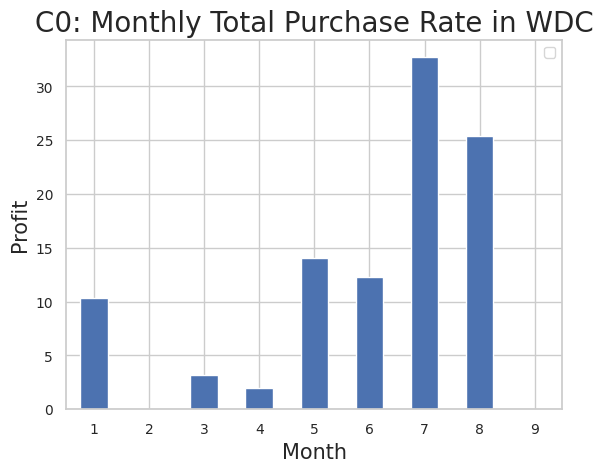

In [ ]:
wdc_0_purchase_ratio.T.plot.bar()

plt.title("C0: Monthly Total Purchase Rate in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Profit", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (2) 주문횟수로 본 월별 구매율

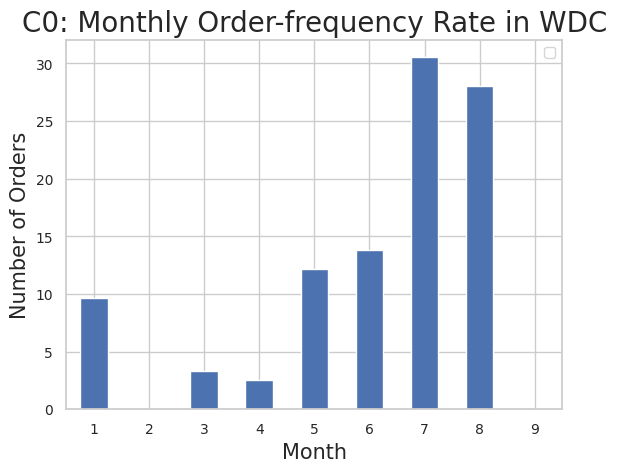

In [ ]:
def WashingtonDC_0_cluster_order(x):
  mask = WashingtonDC_0_cluster['월'] == x
  data = WashingtonDC_0_cluster[mask]['거래ID'].nunique() / WashingtonDC_0_cluster['거래ID'].nunique() * 100
  return round(data, 2)

WashingtonDC_0_cluster_order_all = [WashingtonDC_0_cluster_order(month) for month in range(1, 10)]
WashingtonDC_0_cluster_order_all_df = pd.DataFrame(WashingtonDC_0_cluster_order_all, index=(i for i in range(1,10)))
WashingtonDC_0_cluster_order_all_df.transpose().T.plot.bar()


plt.title("C0: Monthly Order-frequency Rate in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.legend("", fontsize=10)

plt.show()

#### (3) 한달 내 재구매율

In [ ]:
# 워싱 데이터프레임 추출
WashingtonDC_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "Washington DC"]

# 필요한 칼럼만 추출 후 고유값만 남기기
wdc_re = WashingtonDC_0_cluster[["기준연월", "고객ID"]].drop_duplicates(keep="first")

In [ ]:
loop_list = list(wdc_re['기준연월'].unique())   # loop_list =  ['2019-01', '2019-02', '2019-03', '2019-04']
washdc_cluster_0_re_all = []

for i in loop_list:
  c0_left = wdc_re[wdc_re['기준연월'] == i]
  bsym_1m = (pd.to_datetime(i) + pd.DateOffset(months=1)).strftime('%Y-%m')  # 2019-01 + 1달 -> 2019-02 를 string 타입으로 변경
  c0_right = pd.DataFrame(wdc_re[wdc_re['기준연월'] == bsym_1m]['고객ID'].unique())  # 데이터프레임
  c0_right['target'] = 1
  c0_right.columns= ['고객ID', 'target']
  c0_merge = pd.merge(c0_left, c0_right, how='left')
  c0_merge['target'] = c0_merge['target'].fillna(0)
  washdc_cluster_0_re_all.append(c0_merge)

washdc_cluster_0_re_all = pd.concat(washdc_cluster_0_re_all)

In [ ]:
wdc_re.shape, washdc_cluster_0_re_all.shape

((34, 2), (34, 3))

In [ ]:
washdc_repurchase = washdc_cluster_0_re_all.groupby('기준연월')['target'].agg(['sum', 'count']).reset_index()
washdc_repurchase.columns = ['기준연월', 'Y', 'Total']
washdc_repurchase['ratio'] = washdc_repurchase['Y']/washdc_repurchase['Total']
washdc_repurchase = washdc_repurchase.iloc[0:11, :]

In [ ]:
washdc_repurchase

,기준연월,Y,Total,ratio
0,2019-01,0.0,2,0.000000
1,2019-03,0.0,2,0.000000
2,2019-04,1.0,2,0.500000
3,2019-05,1.0,3,0.333333
4,2019-06,1.0,8,0.125000
5,2019-07,3.0,6,0.500000
6,2019-08,0.0,11,0.000000


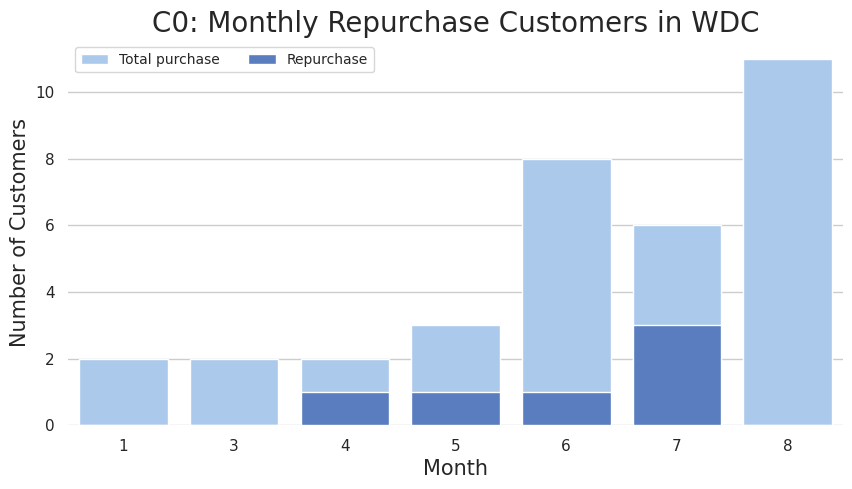

In [ ]:
# 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
washdc_repurchase['기준연월'] = [1, 3, 4, 5, 6, 7, 8]

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(10, 5))
sns.set_color_codes('pastel')

sns.barplot(x='기준연월',
            y='Total',
            data=washdc_repurchase,
            label='Total purchase',
            color='b')

sns.set_color_codes('muted')
sns.barplot(x='기준연월',
            y='Y',
            data=washdc_repurchase,
            label='Repurchase',
            color='b')

axes.set_title("C0: Monthly Repurchase Customers in WDC", fontsize='20')
axes.set_xlabel('Month', fontsize='15')
axes.set_ylabel('Number of Customers', fontsize='15')
axes.legend(ncol=2, frameon=True, fontsize=10)
sns.despine(left=True, bottom=True)

#### (4) 전체기간의 재구매자 비율

In [ ]:
WashingtonDC_0_cluster = cluster_0.loc[cluster_0["고객지역"] == "Washington DC"]

wdc_order_cnt_df = pd.pivot_table(WashingtonDC_0_cluster,
               index= "고객ID",
               columns = "거래날짜",
               values = "거래ID",
               aggfunc = "count"
               )
wdc_order_cnt_df = wdc_order_cnt_df.fillna(0)


N = len(wdc_order_cnt_df.index)
re = []
for i in range(N):
  row = wdc_order_cnt_df.iloc[i]
  r = row.values
  cnt = 0
  for num in r:
    if cnt >= 2 :
      break
    elif num >= 1 :
      cnt += 1
    elif num == 0:
      continue

  if cnt == 2:
    cnt = 1
    re.append(cnt)
  elif cnt == 1:
    cnt = 0
    re.append(cnt)

wdc_0_re_ratio = sum(re) /N * 100
print("Washington DC 재구매율 : ", wdc_0_re_ratio)

Washington DC 재구매율 :  60.0


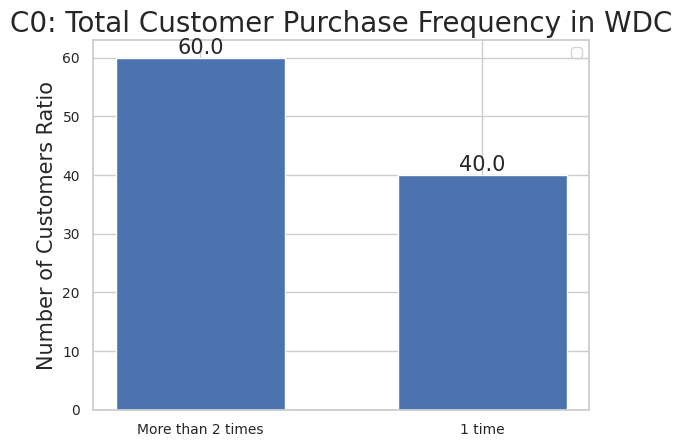

In [ ]:
x = ["More than 2 times", "1 time"]
y = [wdc_0_re_ratio, 100- wdc_0_re_ratio]
bar = plt.bar(x,y,width=0.6)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 15)

plt.title("C0: Total Customer Purchase Frequency in WDC", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Customers Ratio', fontsize=15)
plt.legend("", fontsize=10)

plt.show()

In [ ]:
repur_df.loc["Washington DC"] = wdc_0_re_ratio
repur_df

,재구매자 비율
California,48.148148
Chicago,47.239264
New Jersey,42.592593
New York,54.330709
Washington DC,60.0


### 1-5-2. 선호 품목

In [ ]:
# 주문수량 기준
# 워싱턴 사람들의 주문 중, 주문수량 많은 카테고리 5개 고르기
wdc_categ_quant_top5_index = WashingtonDC_0_cluster.groupby("제품카테고리")["수량"].sum().sort_values(ascending = False).index[:5]

# 가장 많이 산 카테고리 5개만 뽑은 전체 지표
wdc_categ_quant_top5_df = WashingtonDC_0_cluster[WashingtonDC_0_cluster["제품카테고리"].isin(wdc_categ_quant_top5_index)]

# 기준연원 별 카테고리 별 주문 수량 확인
wdc_categ_quant_top5_pt = pd.pivot_table(
    wdc_categ_quant_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "수량",
    aggfunc = "sum"
)
wdc_categ_quant_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,16.0,17.0,1.0,18.0,51.0
2019-03,5.0,49.0,1.0,3.0,11.0
2019-04,9.0,5.0,NaN,2.0,20.0
2019-05,37.0,2.0,19.0,32.0,12.0
2019-06,140.0,11.0,20.0,11.0,169.0
2019-07,57.0,33.0,81.0,52.0,820.0
2019-08,153.0,33.0,17.0,34.0,59.0


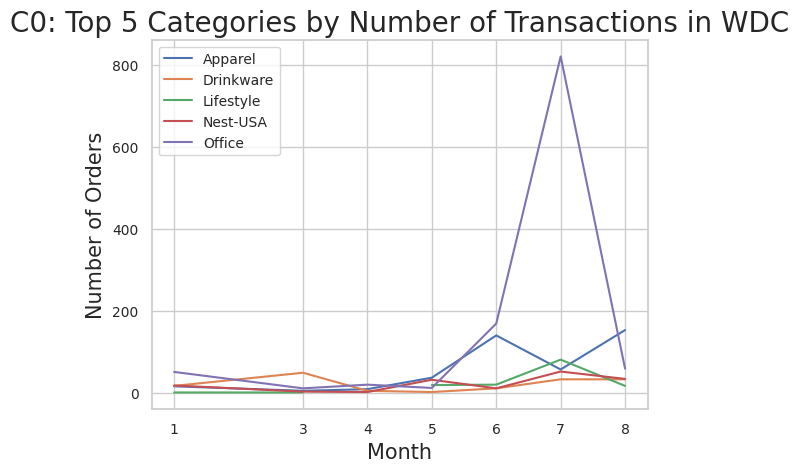

In [ ]:
for col in wdc_categ_quant_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([1,3,4,5,6,7,8], wdc_categ_quant_top5_pt[col], label = col)

plt.title("C0: Top 5 Categories by Number of Transactions in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([1,3,4,5,6,7,8], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

In [ ]:
# 주문횟수
wdc_categ_ordercnt_top5_index = WashingtonDC_0_cluster.groupby("제품카테고리")["거래ID"].count().sort_values(ascending=False).index[:5]

wdc_categ_ordercnt_top5_df = WashingtonDC_0_cluster[WashingtonDC_0_cluster["제품카테고리"].isin(wdc_categ_ordercnt_top5_index)]

wdc_categ_ordercnt_top5_pt = pd.pivot_table(
    wdc_categ_ordercnt_top5_df,
    index = "기준연월",
    columns = "제품카테고리",
    values = "거래ID",
    aggfunc = "count"
).fillna(0)
wdc_categ_ordercnt_top5_pt

제품카테고리,Apparel,Drinkware,Lifestyle,Nest-USA,Office
기준연월,,,,,
2019-01,13.0,5.0,1.0,12.0,5.0
2019-03,5.0,4.0,1.0,2.0,2.0
2019-04,7.0,5.0,0.0,1.0,1.0
2019-05,24.0,1.0,3.0,18.0,7.0
2019-06,46.0,4.0,7.0,7.0,8.0
2019-07,54.0,7.0,10.0,35.0,17.0
2019-08,89.0,6.0,7.0,22.0,10.0


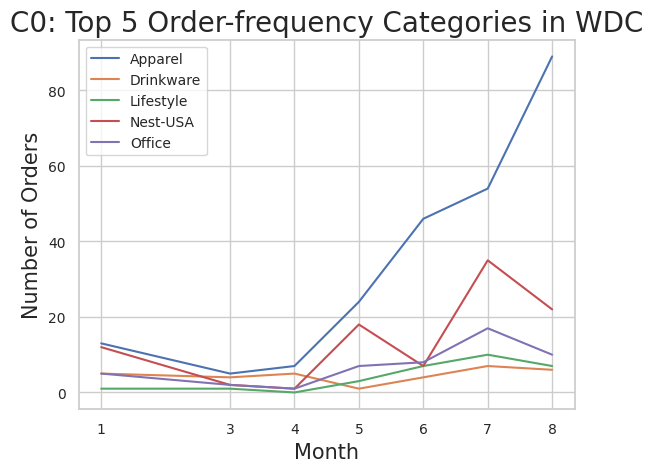

In [ ]:
for col in wdc_categ_ordercnt_top5_pt.columns:
  # 클러스터별 지역마다 남아있는 기준연월 상이하므로 확인 필요합니다!
  plt.plot([1,3,4,5,6,7,8], wdc_categ_ordercnt_top5_pt[col], label=col)

plt.title("C0: Top 5 Order-frequency Categories in WDC", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Orders", fontsize=15)
plt.xticks([1,3,4,5,6,7,8], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

### 1-5-3. 카테고리별 쿠폰 사용

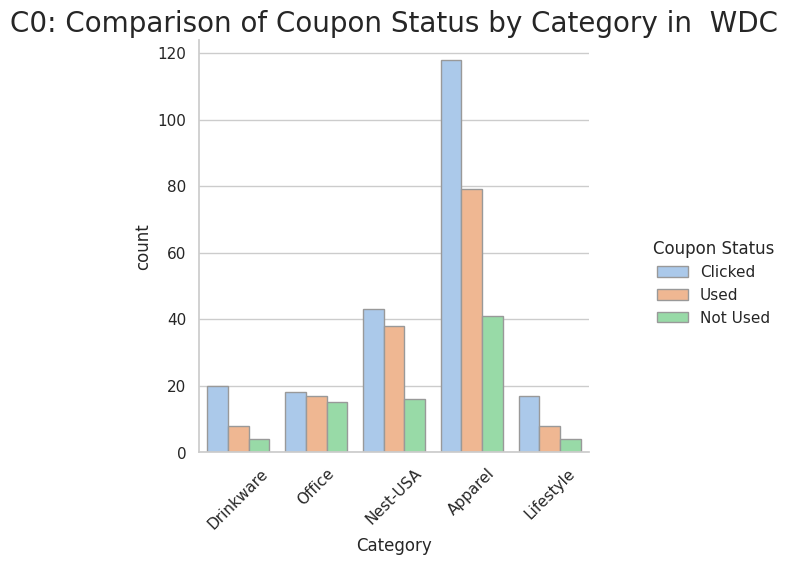

In [ ]:
g = sns.catplot(x='제품카테고리', hue='쿠폰상태', kind ='count', palette='pastel', edgecolor=".6",data=wdc_categ_ordercnt_top5_df);

# 글자 크기 조정
mpl.rcParams['axes.titlesize']  = 20
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
g._legend.set_title('Coupon Status')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.title('C0: Comparison of Coupon Status by Category in  WDC')
plt.show()

## 1-6. 지역별 비교

In [ ]:
region_list = ['Chicago', 'California', 'New Jersey', 'New York', 'Washington DC']

### 1-6-1. 월별 구매분석
- 지역별로 월별 구매한 금액 비교

- 구매 비율로

In [ ]:
cluster_0_purchase_ratio = pd.concat([chic_0_purchase_ratio, cali_0_purchase_ratio, nj_0_purchase_ratio, ny_0_purchase_ratio, wdc_0_purchase_ratio])

In [ ]:
cluster_0_purchase_ratio

,1,2,3,4,5,6,7,8,9
Chicago,3.660857,5.163879,6.380953,9.124256,11.260047,14.437029,18.205407,19.277097,12.490475
California,7.219984,1.083046,8.601160,4.619141,12.547789,15.141765,18.556250,22.947646,9.283221
New Jersey,4.436642,6.160564,4.866048,4.189184,11.590167,27.025945,8.810172,16.593963,16.327315
New York,8.831036,4.970244,9.545532,2.275562,10.900583,14.438503,23.767798,16.390969,8.879773
Washington DC,10.366488,0.000000,3.215760,1.938030,14.027327,12.322289,32.708902,25.421204,0.000000


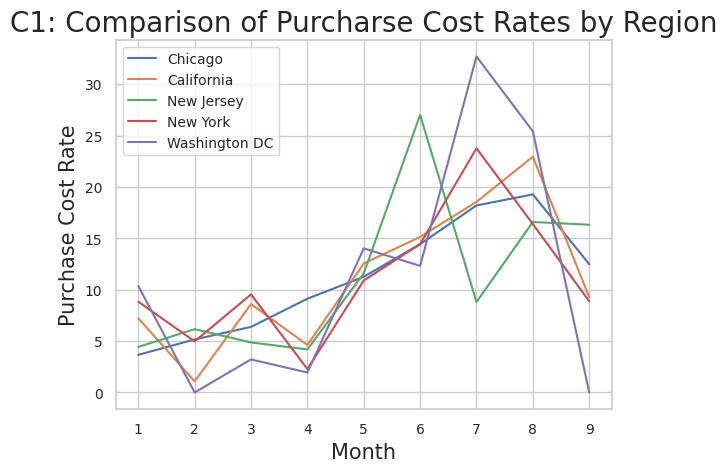

In [ ]:
cluster_0_purchase_ratio.T.plot()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Purchase Cost Rate", fontsize=15)
plt.legend(fontsize=10)
plt.title('C1: Comparison of Purcharse Cost Rates by Region', fontsize=20)
plt.show()

- 구매 금액으로

In [ ]:
cluster_0_purchase_amt = pd.concat([chic_0_purchase_amt, cali_0_purchase_amt, nj_0_purchase_amt, ny_0_purchase_amt, wdc_0_purchase_amt ])

In [ ]:
cluster_0_purchase_amt = cluster_0_purchase_amt.drop("전체 구매금액", axis=1)

In [ ]:
cluster_0_purchase_amt

,1,2,3,4,5,6,7,8,9
고객지역,,,,,,,,,
Chicago,14216.20564,20052.89100,24779.15748,35432.22286,43726.14244,56063.31842,70697.06040,74858.75198,48504.26302
California,25502.03370,3825.47434,30380.54761,16315.47717,44320.61570,53482.91555,65543.37495,81054.42370,32789.68536
New Jersey,4843.65586,6725.72906,5312.45536,4573.49589,12653.43932,29505.28340,9618.41044,18116.27926,17825.16996
New York,26894.28974,15136.52428,29070.23469,6930.06087,33196.94834,43971.42998,72383.13253,49917.52654,27042.71325
Washington DC,3878.00186,0.00000,1202.98454,724.99813,5247.48584,4609.64793,12236.08081,9509.82386,0.00000


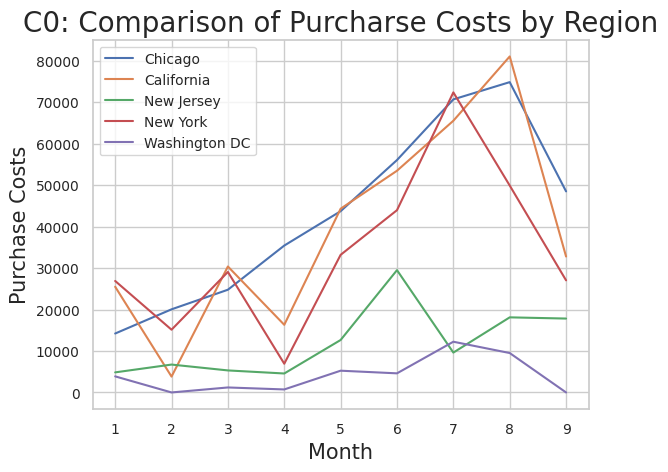

In [ ]:
cluster_0_purchase_amt.T.plot()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Purchase Costs", fontsize=15)
plt.legend(fontsize=10)
plt.title('C0: Comparison of Purcharse Costs by Region', fontsize=20)
plt.show()

### 1-6-2. 지역별 재구매자율 표

In [ ]:
repur_df

,재구매자 비율
California,48.148148
Chicago,47.239264
New Jersey,42.592593
New York,54.330709
Washington DC,60.0


In [ ]:
repur_df = repur_df.sort_values(by = "재구매자 비율", ascending = False)
repur_df

,재구매자 비율
Washington DC,60.0
New York,54.330709
California,48.148148
Chicago,47.239264
New Jersey,42.592593


### 1-6-3. 구매율과 배송료 관계

In [ ]:
def c0_region_order(x):
  mask = cluster_0['고객지역'] == x
  data = cluster_0[mask]['거래ID'].nunique() / cluster_0['거래ID'].nunique() * 100
  return round(data, 2)
c0_region_order_ratio = [c0_region_order(region) for region in region_list]
# c0_region_order_ratio_df = pd.DataFrame(c0_region_order_ratio, index=(region for region in region_list))

def c0_region_delivery(x):
  mask = cluster_0_total_price['고객지역'] == x
  data = cluster_0_total_price[mask]['배송료'].sum() / cluster_0_total_price['배송료'].sum() * 100
  return round(data, 2)

c0_region_delivery_ratio = [c0_region_delivery(region) for region in region_list]
# c0_region_delivery_ratio_df = pd.DataFrame(c0_region_delivery_ratio, index=(region for region in region_list))

c0_order_delivery_df = pd.DataFrame({
    '고객지역': region_list,
    '거래횟수': c0_region_order_ratio,
    '배송료': c0_region_delivery_ratio
})
c0_order_delivery_df

,고객지역,거래횟수,배송료
0,Chicago,33.73,33.50
1,California,28.80,28.67
2,New Jersey,9.78,8.85
3,New York,26.89,25.74
4,Washington DC,3.51,3.24


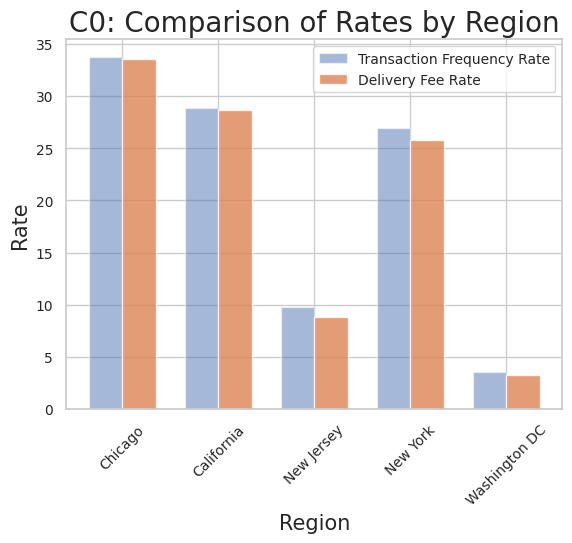

In [ ]:
xlabel = region_list
x = np.arange(len(xlabel))
y1 = c0_region_order_ratio
y2 = c0_region_delivery_ratio

width = 0.35

fig, axes = plt.subplots()
axes.bar(x - width/2, y1, width, align='center', alpha=0.5)
axes.bar(x + width/2, y2, width, align='center', alpha=0.8)

plt.xticks(x, fontsize=10, rotation=45)
plt.yticks(fontsize=10)
axes.set_xticklabels(xlabel, fontsize=10)
plt.xlabel("Region", fontsize=15)
plt.ylabel("Rate", fontsize=15)
plt.legend(["Transaction Frequency Rate","Delivery Fee Rate"], fontsize=10)
plt.title('C0: Comparison of Rates by Region', fontsize=20)
plt.show()